In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import sklearn.metrics as skm

# Traigo DS

Archivos: 
- Car_prices: Set de datos con precio disponible
- Car_prices_test: Set de datos a predecir
- Car_prices_test_result: Set de datos a predecir, con los precios reales (Ver únicamente al finalizar el ejercicio)

### Definición del problema 

Los científicos de datos de una gran cadena de reventa de automóviles en Marruecos han recopilado datos de precios de sus automóviles en sucursales de diferentes ciudades. 
Además, se han logrado definir ciertos atributos de cada vehículo. El objetivo es construir un modelo predictivo para ayudar a poner el precio justo a los vehículos que se venderán esta temporada.
Usando este modelo, la empresa intentará comprender las propiedades de los vehículos que desempeñan un papel clave en la negociación del precio con los clientes. 

### Datos
- **price**	Precio de venta final del vehículo en Dirham
- **year_model**	Año del vehículo
- **mileage**	Rango de kilometraje
- **fuel_type**	Tipo de combustible
- **mark**	Marca del vehículo
- **Model**	Modelo del vehículo
- **Color**	Color del vehículo
- **Repair_history**	Cantidad de reparaciones sufridas por el vehículo
- **Owner_history**	Cantidad de dueños diferentes que ha tenido el vehículo
- **fiscal_power**	Potencia del vehículo en CV
- **city**	Ciudad de venta del vehículo

- a.	Realizar un análisis descriptivo de cada una de las variables presentes en el set de datos “car_prices”
- b.	¿Es necesario hacer algún tipo de limpieza en los datos? Enumere sus hallazgos y comente como serán resueltos
- c.	Analizar la influencia de cada variable respecto al precio de venta individualmente
- d.	Cree al menos 2 nuevas variables para enriquecer el modelo
- e.	Transforme las variables categóricas en variables interpretables por un modelo de regresión
- f.	Separe el conjunto de datos en train, validation y test
    - i.	Evalúe diferentes tipos de modelos y elija el que mejor performance entrega
    - ii.	Realice la predicción del conjunto de Test entregado por la cátedra (car_prices_test) y evalúe qué tan bien su modelo ha predicho en este set de datos utilizando “car_prices_test_result”
- g.	Utilice ahora el método de Cross Validation
    - i.	Evalúe diferentes tipos de modelos y elija el que mejor performance entrega
    - ii.	Realice la predicción del conjunto de Test entregado por la cátedra (car_prices_test) y evalúe qué tan bien su modelo ha predicho en este set de datos utilizando “car_prices_test_result”

# Importo DS

In [2]:
car_prices_ds = pd.read_excel('./car_prices/car_prices.xlsx')
car_prices_ds.head()

,price,year_model,mileage,fuel_type,mark,model,color,repair_history,owner_history,fiscal_power,city
0,40800,2010,25 000 29 999,LPG,Fiat,Punto,Blue,0.0,-1,NaN,Khouribga
1,45000,1998,50 000 54 999,Essence,MercedesBenz,300,Yellow,4.0,1,Plus de 48 CV,Nador
2,23000,2005,120 000 129 999,Essence,Suzuki,BALENO,Yellow,0.0,1,9 CV,Berrechid
3,56000,2005,85 000 89 999,Essence,Daihatsu,Terios,Yellow,4.0,1,9 CV,Casablanca
4,110000,2015,70 000 74 999,Essence,mini,cooper,Red,3.0,1,9 CV,Casablanca


In [3]:
car_prices_ds.dtypes

price               int64
 year_model        object
 mileage           object
 fuel_type         object
 mark              object
 model             object
color              object
repair_history    float64
owner_history       int64
 fiscal_power      object
 city              object
dtype: object

## Exploración de Datos

In [4]:
ds_crudo = pd.read_excel('./car_prices/car_prices.xlsx')
ds_crudo.head()

,price,year_model,mileage,fuel_type,mark,model,color,repair_history,owner_history,fiscal_power,city
0,40800,2010,25 000 29 999,LPG,Fiat,Punto,Blue,0.0,-1,NaN,Khouribga
1,45000,1998,50 000 54 999,Essence,MercedesBenz,300,Yellow,4.0,1,Plus de 48 CV,Nador
2,23000,2005,120 000 129 999,Essence,Suzuki,BALENO,Yellow,0.0,1,9 CV,Berrechid
3,56000,2005,85 000 89 999,Essence,Daihatsu,Terios,Yellow,4.0,1,9 CV,Casablanca
4,110000,2015,70 000 74 999,Essence,mini,cooper,Red,3.0,1,9 CV,Casablanca


## Limpieza de Datos

### ds

In [5]:
car_prices_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8509 entries, 0 to 8508
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           8509 non-null   int64  
 1    year_model     8415 non-null   object 
 2    mileage        8407 non-null   object 
 3    fuel_type      8418 non-null   object 
 4    mark           8422 non-null   object 
 5    model          8414 non-null   object 
 6   color           8509 non-null   object 
 7   repair_history  8472 non-null   float64
 8   owner_history   8509 non-null   int64  
 9    fiscal_power   2831 non-null   object 
 10   city           8509 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 731.4+ KB


In [6]:
car_prices_ds.rename(mapper= lambda x: x.strip(), axis=1, inplace=True)

In [7]:
## year_model es variable int
car_prices_ds.year_model.unique()

array(['2010', '1998', '2005', '2015', '1996', '2008', '2001', '2012',
       '2006', '2013', '2007', '2017', '2004', '1991', '1984', '2009',
       '2011', '1999', '1997', '1987', '1994', '1993', '2014', '1990',
       '2000', '1988', '1995', '2003', '2002', '2016',
       '1980 ou plus ancien', '1982', nan, '1992', '1986', '1989', '1985',
       '2018', '1981', '1983', ' '], dtype=object)

In [8]:
car_prices_ds.year_model.value_counts()

2013                   613
2012                   587
2008                   552
2010                   471
2011                   465
2014                   457
2007                   445
2009                   429
2006                   384
2015                   354
2003                   279
2005                   273
2016                   266
2004                   250
2000                   244
2002                   236
2001                   232
1999                   190
1997                   152
1998                   144
1996                   127
1994                   114
1993                   113
1995                   111
2017                   106
1987                   101
1991                    98
1992                    88
1986                    88
1988                    76
1990                    70
1985                    67
1989                    67
1984                    59
1980 ou plus ancien     31
1981                    20
1983                    19
2

In [9]:
car_prices_ds.year_model.replace({' ':None}, inplace=True)

In [10]:
car_prices_ds.year_model.isnull().value_counts()

False    8412
True       97
Name: year_model, dtype: int64

In [11]:
car_prices_ds.isnull().sum()

price                0
year_model          97
mileage            102
fuel_type           91
mark                87
model               95
color                0
repair_history      37
owner_history        0
fiscal_power      5678
city                 0
dtype: int64

In [12]:
car_prices_ds.loc[car_prices_ds.mileage.isnull()]

,price,year_model,mileage,fuel_type,mark,model,color,repair_history,owner_history,fiscal_power,city
795,190000,2012,NaN,Electrique,Hyundai,ix 35,Blue,5.0,1,NaN,Rabat
1244,150000,2014,NaN,Diesel,Renault,Megane,Black,2.0,1,6 CV,Casablanca
2853,32000,NaN,NaN,NaN,NaN,NaN,Blue,2.0,1,NaN,Agadir
2854,97000,NaN,NaN,NaN,NaN,NaN,Red,2.0,1,NaN,Agadir
2855,37000,2010,NaN,NaN,NaN,NaN,White,5.0,1,NaN,Arfoud
...,...,...,...,...,...,...,...,...,...,...,...
8504,730000,2012,NaN,NaN,NaN,NaN,Red,4.0,3,NaN,SalÃ©
8505,30000,2001,NaN,NaN,NaN,NaN,Yellow,NaN,3,NaN,SalÃ©
8506,38000,2012,NaN,NaN,NaN,NaN,Black,1.0,3,NaN,Sefrou
8507,20000,2015,NaN,NaN,NaN,NaN,Black,1.0,3,NaN,Sidi Kacem


In [13]:
## Veo que hay muchos registro con múltiples NaNs, por lo que empiezo dropeando los nulos múltiples
print(car_prices_ds.shape[0])
car_prices_ds.dropna(subset=['mileage', 'fuel_type', 'mark', 'model'], inplace=True)
print(car_prices_ds.shape[0])

8509
8392


In [14]:
car_prices_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8392 entries, 0 to 8478
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           8392 non-null   int64  
 1   year_model      8310 non-null   object 
 2   mileage         8392 non-null   object 
 3   fuel_type       8392 non-null   object 
 4   mark            8392 non-null   object 
 5   model           8392 non-null   object 
 6   color           8392 non-null   object 
 7   repair_history  8357 non-null   float64
 8   owner_history   8392 non-null   int64  
 9   fiscal_power    2808 non-null   object 
 10  city            8392 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 786.8+ KB


In [15]:
# Fix NaNs de year_model antes de llenar los NaNs de fiscal_power
car_prices_ds.loc[car_prices_ds.year_model.isnull()]

,price,year_model,mileage,fuel_type,mark,model,color,repair_history,owner_history,fiscal_power,city
109,74000,NaN,100 000 109 999,Essence,Renault,Clio,Blue,2.0,1,7 CV,Tanger
116,55000,NaN,100 000 109 999,Essence,Hyundai,i 10,Red,4.0,1,6 CV,BÃ©ni Mellal
130,88000,NaN,20 000 24 999,Essence,Ford,Fiesta,Yellow,2.0,1,6 CV,Casablanca
344,93000,NaN,30 000 34 999,Essence,Hyundai,Grand i10,Red,4.0,1,NaN,Casablanca
347,41000,NaN,250 000 299 999,Essence,Honda,Civic,Black,4.0,1,NaN,Casablanca
...,...,...,...,...,...,...,...,...,...,...,...
8077,120000,NaN,190 000 199 999,Diesel,Citroen,C5,Yellow,3.0,3,NaN,MeknÃ¨s
8149,50000,NaN,250 000 299 999,Diesel,Renault,R19,Blue,5.0,3,NaN,Ouarzazate
8216,165000,NaN,200 000 249 999,Diesel,Land Rover,Range Rover Sport,Black,4.0,3,NaN,Rabat
8345,45000,NaN,300 000 349 999,Diesel,Renault,Megane,Blue,2.0,3,NaN,Sidi Yahya


In [16]:
car_prices_ds.duplicated().any()

False

In [17]:
## Cuál es la mejor manera de proceder con estos NaNs?
print(f'{np.float(car_prices_ds.loc[car_prices_ds.year_model.isnull()].shape[0] / car_prices_ds.shape[0]) * 100} % de la población restante tiene year_model == NaN')

## Como es menos del 1%, dropeo estos NaNs también confiando en que no voy a tener pérdida de información sustancial
car_prices_ds.dropna(subset=['year_model'], inplace=True)

0.9771210676835081 % de la población restante tiene year_model == NaN


In [18]:
car_prices_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8310 entries, 0 to 8478
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           8310 non-null   int64  
 1   year_model      8310 non-null   object 
 2   mileage         8310 non-null   object 
 3   fuel_type       8310 non-null   object 
 4   mark            8310 non-null   object 
 5   model           8310 non-null   object 
 6   color           8310 non-null   object 
 7   repair_history  8276 non-null   float64
 8   owner_history   8310 non-null   int64  
 9   fiscal_power    2786 non-null   object 
 10  city            8310 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 779.1+ KB


In [19]:
car_prices_ds.loc[car_prices_ds.repair_history.isnull()]

,price,year_model,mileage,fuel_type,mark,model,color,repair_history,owner_history,fiscal_power,city
23,88000,2007,90 000 94 999,Essence,Audi,A3,Blue,NaN,1,8 CV,Casablanca
186,23000,1991,20 000 24 999,Essence,Fiat,Uno,Blue,NaN,1,6 CV,Rabat
244,55000,2001,150 000 159 999,Essence,Honda,CRV,Yellow,NaN,1,11 CV,Rabat
305,78000,2010,90 000 94 999,Essence,Seat,Ibiza,White,NaN,1,NaN,Casablanca
358,13000,1999,200 000 249 999,Essence,Renault,R18,Red,NaN,1,NaN,Casablanca
482,38000,2009,5 000 9 999,Essence,Hyundai,Accent,Black,NaN,1,NaN,FÃ¨s
538,62000,2014,75 000 79 999,Essence,Suzuki,Swift,Red,NaN,1,NaN,Marrakech
539,42000,2011,60 000 64 999,Essence,Honda,CRV,Blue,NaN,1,NaN,Marrakech
591,53000,2014,140 000 149 999,Essence,Kia,Picanto,White,NaN,1,NaN,MeknÃ¨s
2613,240000,2009,100 000 109 999,Diesel,MercedesBenz,220,Red,NaN,1,NaN,Rabat


In [20]:
car_prices_ds.repair_history.unique()

array([ 0.,  4.,  3.,  5.,  1., nan,  2.])

In [21]:
car_prices_ds.repair_history.value_counts()

2.0    1431
0.0    1380
1.0    1375
4.0    1371
3.0    1364
5.0    1355
Name: repair_history, dtype: int64

In [22]:
## Como la distribución de repair_history es muy pareja, voy a dropear los pocos NaNs que me quedan
car_prices_ds.repair_history.isnull().sum()

34

In [23]:
car_prices_ds.dropna(subset=['repair_history'], inplace=True)

In [24]:
car_prices_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8276 entries, 0 to 8478
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           8276 non-null   int64  
 1   year_model      8276 non-null   object 
 2   mileage         8276 non-null   object 
 3   fuel_type       8276 non-null   object 
 4   mark            8276 non-null   object 
 5   model           8276 non-null   object 
 6   color           8276 non-null   object 
 7   repair_history  8276 non-null   float64
 8   owner_history   8276 non-null   int64  
 9   fiscal_power    2778 non-null   object 
 10  city            8276 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 775.9+ KB


### Tratamietno de NaNs de fiscal_power

In [25]:
car_prices_ds.fiscal_power.unique()

array([nan, 'Plus de 48 CV', '9 CV', '8 CV', '7 CV', '6 CV', '5 CV',
       '4 CV', '23 CV', '21 CV', '20 CV', '17 CV', '16 CV', '13 CV',
       '11 CV', '10 CV', '40 CV', '15 CV', '12 CV', ' ', '29 CV', '28 CV',
       '26 CV', '14 CV', '34 CV', '31 CV', '24 CV', '18 CV', '39 CV',
       '19 CV'], dtype=object)

In [26]:
car_prices_ds.replace({' ':None}, inplace=True)

In [27]:
car_prices_ds.fiscal_power.value_counts()

6 CV             993
8 CV             634
7 CV             488
9 CV             200
11 CV            113
5 CV             106
12 CV            103
10 CV             49
4 CV              21
17 CV             14
13 CV             11
21 CV              8
20 CV              5
23 CV              4
Plus de 48 CV      3
14 CV              3
15 CV              3
26 CV              2
40 CV              2
29 CV              2
19 CV              1
16 CV              1
39 CV              1
24 CV              1
28 CV              1
34 CV              1
31 CV              1
18 CV              1
Name: fiscal_power, dtype: int64

In [28]:
car_prices_ds.fiscal_power.astype(str).head(20)

0               nan
1     Plus de 48 CV
2              9 CV
3              9 CV
4              9 CV
5              9 CV
6              9 CV
7              9 CV
8              9 CV
9              9 CV
10             9 CV
11             9 CV
12             9 CV
13             9 CV
14             9 CV
15             9 CV
16             9 CV
17             9 CV
18             9 CV
19             9 CV
Name: fiscal_power, dtype: object

In [29]:
car_prices_ds.fiscal_power = car_prices_ds.fiscal_power.astype(str)

In [30]:
car_prices_ds.fiscal_power.head()

0              nan
1    Plus de 48 CV
2             9 CV
3             9 CV
4             9 CV
Name: fiscal_power, dtype: object

In [31]:
car_prices_ds.fiscal_power.unique()

array(['nan', 'Plus de 48 CV', '9 CV', '8 CV', '7 CV', '6 CV', '5 CV',
       '4 CV', '23 CV', '21 CV', '20 CV', '17 CV', '16 CV', '13 CV',
       '11 CV', '10 CV', '40 CV', '15 CV', '12 CV', 'None', '29 CV',
       '28 CV', '26 CV', '14 CV', '34 CV', '31 CV', '24 CV', '18 CV',
       '39 CV', '19 CV'], dtype=object)

In [32]:
car_prices_ds.loc[car_prices_ds.fiscal_power == 'None']

,price,year_model,mileage,fuel_type,mark,model,color,repair_history,owner_history,fiscal_power,city
1485,132000,2008,90 000 94 999,Diesel,Ford,Focus,White,5.0,1,None,Casablanca
1486,119000,1996,100 000 109 999,Diesel,Toyota,Corolla,Yellow,4.0,1,None,Casablanca
4428,48000,2010,20 000 24 999,Diesel,Dacia,Logan,Blue,2.0,2,None,Imouzzer
4429,123000,2015,190 000 199 999,Diesel,Volkswagen,GOLF 5,Blue,1.0,2,None,Rabat
4430,30300,1987,25 000 29 999,Diesel,Citroen,C15,Blue,1.0,2,None,Temara
5967,26000,1995,140 000 149 999,Essence,Peugeot,205,Blue,2.0,3,None,SalÃ©


In [33]:
car_prices_ds.loc[car_prices_ds.fiscal_power == 'nan']

,price,year_model,mileage,fuel_type,mark,model,color,repair_history,owner_history,fiscal_power,city
0,40800,2010,25 000 29 999,LPG,Fiat,Punto,Blue,0.0,-1,nan,Khouribga
253,66000,2006,90 000 94 999,Essence,Ford,Ka,White,1.0,1,nan,Agadir
254,70000,2010,80 000 84 999,Essence,Ford,Fiesta,Red,4.0,1,nan,Agadir
255,19000,2013,55 000 59 999,Essence,Renault,R21,Yellow,0.0,1,nan,Agadir
256,39000,2015,5 000 9 999,Essence,Peugeot,206,Yellow,0.0,1,nan,Agadir
...,...,...,...,...,...,...,...,...,...,...,...
8474,110000,2001,300 000 349 999,Diesel,Ford,Mondeo,Red,5.0,3,nan,Youssoufia
8475,100000,2012,20 000 24 999,Diesel,Dacia,Sandero,White,2.0,3,nan,Youssoufia
8476,45000,1996,190 000 199 999,Diesel,Fiat,Palio,Blue,3.0,3,nan,Youssoufia
8477,92000,2010,150 000 159 999,Diesel,Ford,Fiesta,Yellow,4.0,3,nan,Youssoufia


In [34]:
def clean_fiscal_power(fp):
    if (fp == 'nan') | (fp == 'None'):
        return None
    else:
        x = str(fp).lower().strip().replace('plus de', '').replace('cv', '').strip()
        return int(x.lower())

car_prices_ds.fiscal_power = car_prices_ds.fiscal_power.apply(lambda fp: clean_fiscal_power(fp))
car_prices_ds.fiscal_power.head()

0     NaN
1    48.0
2     9.0
3     9.0
4     9.0
Name: fiscal_power, dtype: float64

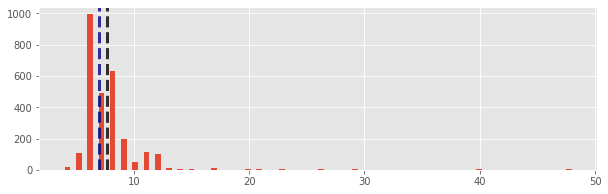

In [35]:
plt.figure(figsize=(10,3))
car_prices_ds.fiscal_power.hist(bins=int(np.sqrt(car_prices_ds.shape[0])))
plt.axvline(car_prices_ds.fiscal_power.mean(), ls='--', lw=3, color='black', alpha=0.8, label='mean')
plt.axvline(car_prices_ds.fiscal_power.median(), ls='--', lw=3, color='navy', alpha=0.8, label='median')

In [36]:
## Dado que hay una marcada tendencia a los valores entre media y mediana en la distribución de fiscal_power
## (hay poca dispersión), voy a rellenar los valores faltantes con la media de fiscal_power

car_prices_ds.fiscal_power.fillna(car_prices_ds.fiscal_power.median(), inplace=True)
## completo en la mediana porque es un parámetro más robusto de la descripción de la distribución y no 
## está sesgada por outliers [tanto] como si lo está la media

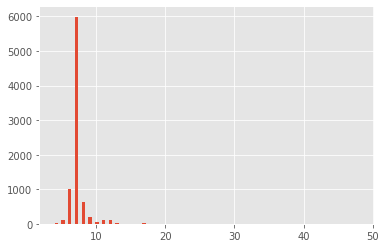

In [37]:
car_prices_ds.fiscal_power.hist(bins=int(np.sqrt(car_prices_ds.shape[0]))) ## se evidencia el aumento en la carga de la mediana

In [38]:
car_prices_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8276 entries, 0 to 8478
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           8276 non-null   int64  
 1   year_model      8276 non-null   object 
 2   mileage         8276 non-null   object 
 3   fuel_type       8276 non-null   object 
 4   mark            8276 non-null   object 
 5   model           8276 non-null   object 
 6   color           8276 non-null   object 
 7   repair_history  8276 non-null   float64
 8   owner_history   8276 non-null   int64  
 9   fiscal_power    8276 non-null   float64
 10  city            8276 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 775.9+ KB


In [39]:
car_prices_ds.head()

,price,year_model,mileage,fuel_type,mark,model,color,repair_history,owner_history,fiscal_power,city
0,40800,2010,25 000 29 999,LPG,Fiat,Punto,Blue,0.0,-1,7.0,Khouribga
1,45000,1998,50 000 54 999,Essence,MercedesBenz,300,Yellow,4.0,1,48.0,Nador
2,23000,2005,120 000 129 999,Essence,Suzuki,BALENO,Yellow,0.0,1,9.0,Berrechid
3,56000,2005,85 000 89 999,Essence,Daihatsu,Terios,Yellow,4.0,1,9.0,Casablanca
4,110000,2015,70 000 74 999,Essence,mini,cooper,Red,3.0,1,9.0,Casablanca


In [40]:
car_prices_ds.dtypes

price               int64
year_model         object
mileage            object
fuel_type          object
mark               object
model              object
color              object
repair_history    float64
owner_history       int64
fiscal_power      float64
city               object
dtype: object

In [41]:
car_prices_ds.year_model = car_prices_ds.year_model.apply(lambda x: int(x[:4])) ## Convierto años anteriores a 1980 a 1980 directo
car_prices_ds.year_model.unique()

array([2010, 1998, 2005, 2015, 1996, 2008, 2001, 2012, 2006, 2013, 2007,
       2017, 2004, 1991, 1984, 2009, 2011, 1999, 1997, 1987, 1994, 1993,
       2014, 1990, 2000, 1988, 1995, 2003, 2002, 2016, 1980, 1982, 1992,
       1986, 1989, 1985, 2018, 1981, 1983], dtype=int64)

In [42]:
car_prices_ds.head()

,price,year_model,mileage,fuel_type,mark,model,color,repair_history,owner_history,fiscal_power,city
0,40800,2010,25 000 29 999,LPG,Fiat,Punto,Blue,0.0,-1,7.0,Khouribga
1,45000,1998,50 000 54 999,Essence,MercedesBenz,300,Yellow,4.0,1,48.0,Nador
2,23000,2005,120 000 129 999,Essence,Suzuki,BALENO,Yellow,0.0,1,9.0,Berrechid
3,56000,2005,85 000 89 999,Essence,Daihatsu,Terios,Yellow,4.0,1,9.0,Casablanca
4,110000,2015,70 000 74 999,Essence,mini,cooper,Red,3.0,1,9.0,Casablanca


In [43]:
car_prices_ds.dtypes

price               int64
year_model          int64
mileage            object
fuel_type          object
mark               object
model              object
color              object
repair_history    float64
owner_history       int64
fiscal_power      float64
city               object
dtype: object

### ds crudo

In [44]:
ds_crudo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8509 entries, 0 to 8508
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           8509 non-null   int64  
 1    year_model     8415 non-null   object 
 2    mileage        8407 non-null   object 
 3    fuel_type      8418 non-null   object 
 4    mark           8422 non-null   object 
 5    model          8414 non-null   object 
 6   color           8509 non-null   object 
 7   repair_history  8472 non-null   float64
 8   owner_history   8509 non-null   int64  
 9    fiscal_power   2831 non-null   object 
 10   city           8509 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 731.4+ KB


In [45]:
ds_crudo.rename(mapper= lambda x: x.strip(), axis=1, inplace=True)

In [46]:
## year_model es variable int
ds_crudo.year_model.unique()

array(['2010', '1998', '2005', '2015', '1996', '2008', '2001', '2012',
       '2006', '2013', '2007', '2017', '2004', '1991', '1984', '2009',
       '2011', '1999', '1997', '1987', '1994', '1993', '2014', '1990',
       '2000', '1988', '1995', '2003', '2002', '2016',
       '1980 ou plus ancien', '1982', nan, '1992', '1986', '1989', '1985',
       '2018', '1981', '1983', ' '], dtype=object)

In [47]:
ds_crudo.year_model.value_counts()

2013                   613
2012                   587
2008                   552
2010                   471
2011                   465
2014                   457
2007                   445
2009                   429
2006                   384
2015                   354
2003                   279
2005                   273
2016                   266
2004                   250
2000                   244
2002                   236
2001                   232
1999                   190
1997                   152
1998                   144
1996                   127
1994                   114
1993                   113
1995                   111
2017                   106
1987                   101
1991                    98
1992                    88
1986                    88
1988                    76
1990                    70
1985                    67
1989                    67
1984                    59
1980 ou plus ancien     31
1981                    20
1983                    19
2

In [48]:
ds_crudo.year_model.replace({' ':None}, inplace=True)

In [49]:
ds_crudo.year_model.isnull().value_counts()

False    8412
True       97
Name: year_model, dtype: int64

In [50]:
ds_crudo.isnull().sum()

price                0
year_model          97
mileage            102
fuel_type           91
mark                87
model               95
color                0
repair_history      37
owner_history        0
fiscal_power      5678
city                 0
dtype: int64

In [51]:
ds_crudo.loc[ds_crudo.mileage.isnull()]

,price,year_model,mileage,fuel_type,mark,model,color,repair_history,owner_history,fiscal_power,city
795,190000,2012,NaN,Electrique,Hyundai,ix 35,Blue,5.0,1,NaN,Rabat
1244,150000,2014,NaN,Diesel,Renault,Megane,Black,2.0,1,6 CV,Casablanca
2853,32000,NaN,NaN,NaN,NaN,NaN,Blue,2.0,1,NaN,Agadir
2854,97000,NaN,NaN,NaN,NaN,NaN,Red,2.0,1,NaN,Agadir
2855,37000,2010,NaN,NaN,NaN,NaN,White,5.0,1,NaN,Arfoud
...,...,...,...,...,...,...,...,...,...,...,...
8504,730000,2012,NaN,NaN,NaN,NaN,Red,4.0,3,NaN,SalÃ©
8505,30000,2001,NaN,NaN,NaN,NaN,Yellow,NaN,3,NaN,SalÃ©
8506,38000,2012,NaN,NaN,NaN,NaN,Black,1.0,3,NaN,Sefrou
8507,20000,2015,NaN,NaN,NaN,NaN,Black,1.0,3,NaN,Sidi Kacem


In [52]:
## Veo que hay muchos registro con múltiples NaNs, por lo que empiezo dropeando los nulos múltiples
print(ds_crudo.shape[0])
ds_crudo.dropna(subset=['mileage', 'fuel_type', 'mark', 'model'], inplace=True)
print(ds_crudo.shape[0])

8509
8392


In [53]:
ds_crudo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8392 entries, 0 to 8478
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           8392 non-null   int64  
 1   year_model      8310 non-null   object 
 2   mileage         8392 non-null   object 
 3   fuel_type       8392 non-null   object 
 4   mark            8392 non-null   object 
 5   model           8392 non-null   object 
 6   color           8392 non-null   object 
 7   repair_history  8357 non-null   float64
 8   owner_history   8392 non-null   int64  
 9   fiscal_power    2808 non-null   object 
 10  city            8392 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 786.8+ KB


In [54]:
# Fix NaNs de year_model antes de llenar los NaNs de fiscal_power
ds_crudo.loc[ds_crudo.year_model.isnull()]

,price,year_model,mileage,fuel_type,mark,model,color,repair_history,owner_history,fiscal_power,city
109,74000,NaN,100 000 109 999,Essence,Renault,Clio,Blue,2.0,1,7 CV,Tanger
116,55000,NaN,100 000 109 999,Essence,Hyundai,i 10,Red,4.0,1,6 CV,BÃ©ni Mellal
130,88000,NaN,20 000 24 999,Essence,Ford,Fiesta,Yellow,2.0,1,6 CV,Casablanca
344,93000,NaN,30 000 34 999,Essence,Hyundai,Grand i10,Red,4.0,1,NaN,Casablanca
347,41000,NaN,250 000 299 999,Essence,Honda,Civic,Black,4.0,1,NaN,Casablanca
...,...,...,...,...,...,...,...,...,...,...,...
8077,120000,NaN,190 000 199 999,Diesel,Citroen,C5,Yellow,3.0,3,NaN,MeknÃ¨s
8149,50000,NaN,250 000 299 999,Diesel,Renault,R19,Blue,5.0,3,NaN,Ouarzazate
8216,165000,NaN,200 000 249 999,Diesel,Land Rover,Range Rover Sport,Black,4.0,3,NaN,Rabat
8345,45000,NaN,300 000 349 999,Diesel,Renault,Megane,Blue,2.0,3,NaN,Sidi Yahya


In [55]:
ds_crudo.duplicated().any()

False

In [56]:
## Cuál es la mejor manera de proceder con estos NaNs?
print(f'{np.float(ds_crudo.loc[ds_crudo.year_model.isnull()].shape[0] / ds_crudo.shape[0]) * 100} % de la población restante tiene year_model == NaN')

## Como es menos del 1%, dropeo estos NaNs también confiando en que no voy a tener pérdida de información sustancial
ds_crudo.dropna(subset=['year_model'], inplace=True)

0.9771210676835081 % de la población restante tiene year_model == NaN


In [57]:
ds_crudo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8310 entries, 0 to 8478
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           8310 non-null   int64  
 1   year_model      8310 non-null   object 
 2   mileage         8310 non-null   object 
 3   fuel_type       8310 non-null   object 
 4   mark            8310 non-null   object 
 5   model           8310 non-null   object 
 6   color           8310 non-null   object 
 7   repair_history  8276 non-null   float64
 8   owner_history   8310 non-null   int64  
 9   fiscal_power    2786 non-null   object 
 10  city            8310 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 779.1+ KB


In [58]:
ds_crudo.loc[ds_crudo.repair_history.isnull()]

,price,year_model,mileage,fuel_type,mark,model,color,repair_history,owner_history,fiscal_power,city
23,88000,2007,90 000 94 999,Essence,Audi,A3,Blue,NaN,1,8 CV,Casablanca
186,23000,1991,20 000 24 999,Essence,Fiat,Uno,Blue,NaN,1,6 CV,Rabat
244,55000,2001,150 000 159 999,Essence,Honda,CRV,Yellow,NaN,1,11 CV,Rabat
305,78000,2010,90 000 94 999,Essence,Seat,Ibiza,White,NaN,1,NaN,Casablanca
358,13000,1999,200 000 249 999,Essence,Renault,R18,Red,NaN,1,NaN,Casablanca
482,38000,2009,5 000 9 999,Essence,Hyundai,Accent,Black,NaN,1,NaN,FÃ¨s
538,62000,2014,75 000 79 999,Essence,Suzuki,Swift,Red,NaN,1,NaN,Marrakech
539,42000,2011,60 000 64 999,Essence,Honda,CRV,Blue,NaN,1,NaN,Marrakech
591,53000,2014,140 000 149 999,Essence,Kia,Picanto,White,NaN,1,NaN,MeknÃ¨s
2613,240000,2009,100 000 109 999,Diesel,MercedesBenz,220,Red,NaN,1,NaN,Rabat


In [59]:
ds_crudo.repair_history.unique()

array([ 0.,  4.,  3.,  5.,  1., nan,  2.])

In [60]:
ds_crudo.repair_history.value_counts()

2.0    1431
0.0    1380
1.0    1375
4.0    1371
3.0    1364
5.0    1355
Name: repair_history, dtype: int64

In [61]:
## Como la distribución de repair_history es muy pareja, voy a dropear los pocos NaNs que me quedan
ds_crudo.repair_history.isnull().sum()

34

In [62]:
ds_crudo.dropna(subset=['repair_history'], inplace=True)

In [63]:
ds_crudo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8276 entries, 0 to 8478
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           8276 non-null   int64  
 1   year_model      8276 non-null   object 
 2   mileage         8276 non-null   object 
 3   fuel_type       8276 non-null   object 
 4   mark            8276 non-null   object 
 5   model           8276 non-null   object 
 6   color           8276 non-null   object 
 7   repair_history  8276 non-null   float64
 8   owner_history   8276 non-null   int64  
 9   fiscal_power    2778 non-null   object 
 10  city            8276 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 775.9+ KB


#### Tratamietno de NaNs de fiscal_power

In [64]:
ds_crudo.fiscal_power.unique()

array([nan, 'Plus de 48 CV', '9 CV', '8 CV', '7 CV', '6 CV', '5 CV',
       '4 CV', '23 CV', '21 CV', '20 CV', '17 CV', '16 CV', '13 CV',
       '11 CV', '10 CV', '40 CV', '15 CV', '12 CV', ' ', '29 CV', '28 CV',
       '26 CV', '14 CV', '34 CV', '31 CV', '24 CV', '18 CV', '39 CV',
       '19 CV'], dtype=object)

In [65]:
ds_crudo.replace({' ':None}, inplace=True)

In [66]:
ds_crudo.fiscal_power.value_counts()

6 CV             993
8 CV             634
7 CV             488
9 CV             200
11 CV            113
5 CV             106
12 CV            103
10 CV             49
4 CV              21
17 CV             14
13 CV             11
21 CV              8
20 CV              5
23 CV              4
Plus de 48 CV      3
14 CV              3
15 CV              3
26 CV              2
40 CV              2
29 CV              2
19 CV              1
16 CV              1
39 CV              1
24 CV              1
28 CV              1
34 CV              1
31 CV              1
18 CV              1
Name: fiscal_power, dtype: int64

In [67]:
ds_crudo.fiscal_power.astype(str).head(20)

0               nan
1     Plus de 48 CV
2              9 CV
3              9 CV
4              9 CV
5              9 CV
6              9 CV
7              9 CV
8              9 CV
9              9 CV
10             9 CV
11             9 CV
12             9 CV
13             9 CV
14             9 CV
15             9 CV
16             9 CV
17             9 CV
18             9 CV
19             9 CV
Name: fiscal_power, dtype: object

In [68]:
ds_crudo.fiscal_power = ds_crudo.fiscal_power.astype(str)

In [69]:
ds_crudo.fiscal_power.head()

0              nan
1    Plus de 48 CV
2             9 CV
3             9 CV
4             9 CV
Name: fiscal_power, dtype: object

In [70]:
ds_crudo.fiscal_power.unique()

array(['nan', 'Plus de 48 CV', '9 CV', '8 CV', '7 CV', '6 CV', '5 CV',
       '4 CV', '23 CV', '21 CV', '20 CV', '17 CV', '16 CV', '13 CV',
       '11 CV', '10 CV', '40 CV', '15 CV', '12 CV', 'None', '29 CV',
       '28 CV', '26 CV', '14 CV', '34 CV', '31 CV', '24 CV', '18 CV',
       '39 CV', '19 CV'], dtype=object)

In [71]:
ds_crudo.loc[ds_crudo.fiscal_power == 'None']

,price,year_model,mileage,fuel_type,mark,model,color,repair_history,owner_history,fiscal_power,city
1485,132000,2008,90 000 94 999,Diesel,Ford,Focus,White,5.0,1,None,Casablanca
1486,119000,1996,100 000 109 999,Diesel,Toyota,Corolla,Yellow,4.0,1,None,Casablanca
4428,48000,2010,20 000 24 999,Diesel,Dacia,Logan,Blue,2.0,2,None,Imouzzer
4429,123000,2015,190 000 199 999,Diesel,Volkswagen,GOLF 5,Blue,1.0,2,None,Rabat
4430,30300,1987,25 000 29 999,Diesel,Citroen,C15,Blue,1.0,2,None,Temara
5967,26000,1995,140 000 149 999,Essence,Peugeot,205,Blue,2.0,3,None,SalÃ©


In [72]:
ds_crudo.loc[ds_crudo.fiscal_power == 'nan']

,price,year_model,mileage,fuel_type,mark,model,color,repair_history,owner_history,fiscal_power,city
0,40800,2010,25 000 29 999,LPG,Fiat,Punto,Blue,0.0,-1,nan,Khouribga
253,66000,2006,90 000 94 999,Essence,Ford,Ka,White,1.0,1,nan,Agadir
254,70000,2010,80 000 84 999,Essence,Ford,Fiesta,Red,4.0,1,nan,Agadir
255,19000,2013,55 000 59 999,Essence,Renault,R21,Yellow,0.0,1,nan,Agadir
256,39000,2015,5 000 9 999,Essence,Peugeot,206,Yellow,0.0,1,nan,Agadir
...,...,...,...,...,...,...,...,...,...,...,...
8474,110000,2001,300 000 349 999,Diesel,Ford,Mondeo,Red,5.0,3,nan,Youssoufia
8475,100000,2012,20 000 24 999,Diesel,Dacia,Sandero,White,2.0,3,nan,Youssoufia
8476,45000,1996,190 000 199 999,Diesel,Fiat,Palio,Blue,3.0,3,nan,Youssoufia
8477,92000,2010,150 000 159 999,Diesel,Ford,Fiesta,Yellow,4.0,3,nan,Youssoufia


In [73]:
def clean_fiscal_power(fp):
    if (fp == 'nan') | (fp == 'None'):
        return None
    else:
        x = str(fp).lower().strip().replace('plus de', '').replace('cv', '').strip()
        return int(x.lower())

ds_crudo.fiscal_power = ds_crudo.fiscal_power.apply(lambda fp: clean_fiscal_power(fp))
ds_crudo.fiscal_power.head()

0     NaN
1    48.0
2     9.0
3     9.0
4     9.0
Name: fiscal_power, dtype: float64

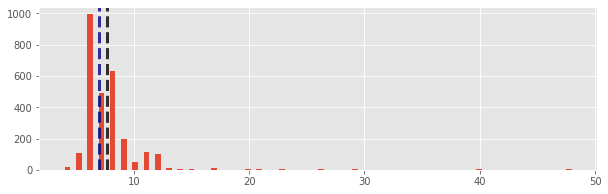

In [74]:
plt.figure(figsize=(10,3))
ds_crudo.fiscal_power.hist(bins=int(np.sqrt(ds_crudo.shape[0])))
plt.axvline(ds_crudo.fiscal_power.mean(), ls='--', lw=3, color='black', alpha=0.8, label='mean')
plt.axvline(ds_crudo.fiscal_power.median(), ls='--', lw=3, color='navy', alpha=0.8, label='median')

In [75]:
## Dado que hay una marcada tendencia a los valores entre media y mediana en la distribución de fiscal_power
## (hay poca dispersión), voy a rellenar los valores faltantes con la media de fiscal_power

ds_crudo.fiscal_power.fillna(ds_crudo.fiscal_power.median(), inplace=True)
## completo en la mediana porque es un parámetro más robusto de la descripción de la distribución y no 
## está sesgada por outliers [tanto] como si lo está la media

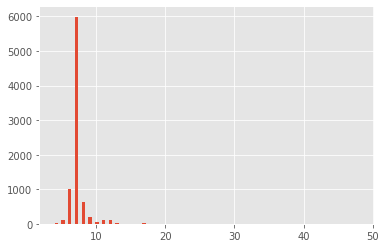

In [76]:
ds_crudo.fiscal_power.hist(bins=int(np.sqrt(ds_crudo.shape[0]))) ## se evidencia el aumento en la carga de la mediana

In [77]:
ds_crudo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8276 entries, 0 to 8478
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           8276 non-null   int64  
 1   year_model      8276 non-null   object 
 2   mileage         8276 non-null   object 
 3   fuel_type       8276 non-null   object 
 4   mark            8276 non-null   object 
 5   model           8276 non-null   object 
 6   color           8276 non-null   object 
 7   repair_history  8276 non-null   float64
 8   owner_history   8276 non-null   int64  
 9   fiscal_power    8276 non-null   float64
 10  city            8276 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 775.9+ KB


In [78]:
ds_crudo.head()

,price,year_model,mileage,fuel_type,mark,model,color,repair_history,owner_history,fiscal_power,city
0,40800,2010,25 000 29 999,LPG,Fiat,Punto,Blue,0.0,-1,7.0,Khouribga
1,45000,1998,50 000 54 999,Essence,MercedesBenz,300,Yellow,4.0,1,48.0,Nador
2,23000,2005,120 000 129 999,Essence,Suzuki,BALENO,Yellow,0.0,1,9.0,Berrechid
3,56000,2005,85 000 89 999,Essence,Daihatsu,Terios,Yellow,4.0,1,9.0,Casablanca
4,110000,2015,70 000 74 999,Essence,mini,cooper,Red,3.0,1,9.0,Casablanca


In [79]:
ds_crudo.dtypes

price               int64
year_model         object
mileage            object
fuel_type          object
mark               object
model              object
color              object
repair_history    float64
owner_history       int64
fiscal_power      float64
city               object
dtype: object

In [80]:
ds_crudo.year_model = ds_crudo.year_model.apply(lambda x: int(x[:4])) ## Convierto años anteriores a 1980 a 1980 directo
ds_crudo.year_model.unique()

array([2010, 1998, 2005, 2015, 1996, 2008, 2001, 2012, 2006, 2013, 2007,
       2017, 2004, 1991, 1984, 2009, 2011, 1999, 1997, 1987, 1994, 1993,
       2014, 1990, 2000, 1988, 1995, 2003, 2002, 2016, 1980, 1982, 1992,
       1986, 1989, 1985, 2018, 1981, 1983], dtype=int64)

In [81]:
ds_crudo.head()

,price,year_model,mileage,fuel_type,mark,model,color,repair_history,owner_history,fiscal_power,city
0,40800,2010,25 000 29 999,LPG,Fiat,Punto,Blue,0.0,-1,7.0,Khouribga
1,45000,1998,50 000 54 999,Essence,MercedesBenz,300,Yellow,4.0,1,48.0,Nador
2,23000,2005,120 000 129 999,Essence,Suzuki,BALENO,Yellow,0.0,1,9.0,Berrechid
3,56000,2005,85 000 89 999,Essence,Daihatsu,Terios,Yellow,4.0,1,9.0,Casablanca
4,110000,2015,70 000 74 999,Essence,mini,cooper,Red,3.0,1,9.0,Casablanca


In [82]:
ds_crudo.dtypes

price               int64
year_model          int64
mileage            object
fuel_type          object
mark               object
model              object
color              object
repair_history    float64
owner_history       int64
fiscal_power      float64
city               object
dtype: object

### Preparación de datos

#### mileage

In [83]:
car_prices_ds.mileage.unique()

array(['25 000  29 999', '50 000  54 999', '120 000  129 999',
       '85 000  89 999', '70 000  74 999', '45 000  49 999',
       '250 000  299 999', '110 000  119 999', '200 000  249 999',
       '90 000  94 999', '60 000  64 999', '0  4 999', '190 000  199 999',
       '140 000  149 999', '75 000  79 999', '130 000  139 999',
       '95 000  99 999', '80 000  84 999', '35 000  39 999',
       '30 000  34 999', '180 000  189 999', '170 000  179 999',
       '100 000  109 999', '10 000  14 999', '350 000  399 999',
       '150 000  159 999', '20 000  24 999', 'Plus de 500 000',
       '5 000  9 999', '160 000  169 999', '15 000  19 999',
       '65 000  69 999', ' 55 000  59 999', '55 000  59 999',
       '40 000  44 999', '300 000  349 999', ' 65 000  69 999',
       '450 000  499 999', '400 000  449 999', ' 120 000  129 999',
       ' 80 000  84 999', ' 20 000  24 999', ' 60 000  64 999',
       ' 100 000  109 999', ' 180 000  189 999', ' 10 000  14 999'],
      dtype=object)

In [84]:
test = car_prices_ds.mileage.values[0]
int(''.join(test.strip().split(' ')[:2]))

25000

In [85]:
### Me quedo con el limite inferior para distinguir cada clase
def get_lower_limit_mileage(mileage):
    if mileage.strip().startswith('Plus'):
        return 500000
    return int(''.join(mileage.strip().split(' ')[:2]))

car_prices_ds.mileage = car_prices_ds.mileage.apply(get_lower_limit_mileage)

In [86]:
car_prices_ds.mileage.value_counts()

200000    703
100000    455
120000    389
130000    359
190000    356
250000    342
140000    330
150000    309
110000    305
170000    290
180000    288
0         278
160000    270
15000     241
90000     241
20000     235
80000     210
95000     198
25000     183
5000      179
300000    175
10000     171
30000     170
70000     168
75000     166
35000     166
85000     148
60000     146
45000     125
50000     123
40000     122
65000     120
55000     115
350000     83
400000     45
500000     41
450000     31
Name: mileage, dtype: int64

#### fuel_type

In [87]:
car_prices_ds.fuel_type.unique()

array(['LPG', 'Essence', 'Electrique', 'Deisel', 'Diesel'], dtype=object)

In [88]:
car_prices_ds.replace({
    'Deisel':'Diesel'
}, inplace=True)

In [89]:
ds_crudo.replace({
    'Deisel':'Diesel'
}, inplace=True)

In [90]:
car_prices_ds.fuel_type = car_prices_ds.fuel_type.apply(str.lower)

In [91]:
car_prices_ds.fuel_type.unique()

array(['lpg', 'essence', 'electrique', 'diesel'], dtype=object)

In [92]:
car_prices_ds = pd.get_dummies(data=car_prices_ds, columns=['fuel_type'], drop_first=True, prefix='fuel')

#### mark

In [93]:
car_prices_ds.mark.unique()

array(['Fiat', 'MercedesBenz', 'Suzuki', 'Daihatsu', 'mini', 'Hyundai',
       'Honda', 'Chevrolet', 'Nissan', 'Peugeot', 'Renault', 'Daewoo',
       'Land Rover', 'Dacia', 'Seat', 'Alfa Romeo', 'Citroen', 'Kia',
       'Toyota', 'Rover', 'Autres', 'Mazda', 'Opel', 'Volkswagen', 'Ford',
       'Chery', 'Cadillac', 'BMW', 'Jeep', 'Chrysler', 'Mitsubishi',
       'Jaguar', 'Porsche', 'Audi', 'Zotye', 'Acura', 'Skoda', 'Geely',
       'Infiniti', 'Volvo', 'Ssangyong', 'Dodge', 'Maserati', 'Isuzu',
       'lancia', 'GMC', 'BYD', 'Changhe', 'Bentley', 'Foton', 'UFO',
       'Hummer', 'Lexus', 'Pontiac'], dtype=object)

In [94]:
car_prices_ds.mark.value_counts()

Renault         1236
Peugeot         1096
Volkswagen       906
Fiat             678
Dacia            595
MercedesBenz     570
Citroen          447
Hyundai          415
Ford             318
Kia              230
Toyota           226
BMW              203
Honda            195
Audi             156
Opel             112
Suzuki           105
Nissan           105
Seat              88
Mitsubishi        70
Land Rover        70
Chevrolet         65
Alfa Romeo        54
Ssangyong         36
Skoda             33
Chery             31
mini              31
Daihatsu          21
Volvo             20
Jeep              20
Mazda             19
Autres            18
Porsche           17
Daewoo            14
Jaguar            13
Rover             10
Isuzu              8
lancia             6
Dodge              5
Geely              5
BYD                4
Maserati           4
Changhe            3
Infiniti           3
Chrysler           3
GMC                2
Bentley            2
Pontiac            1
Zotye        

In [95]:
car_prices_ds.mark.count()

8276

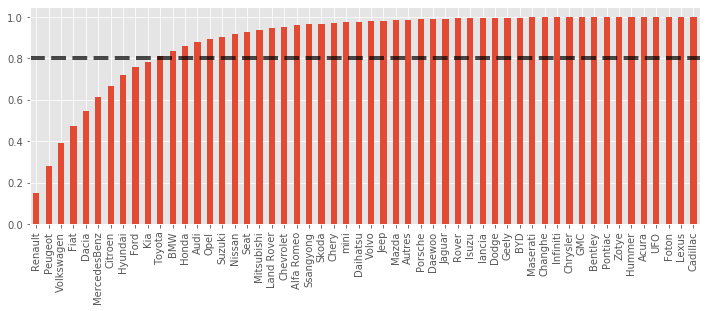

In [96]:
car_prices_ds.mark.value_counts().cumsum().apply(lambda x: x/car_prices_ds.mark.count()).plot(kind='bar', figsize=(12,4))
plt.axhline(0.8, ls='--', color='black', lw=4, alpha=0.7)

In [97]:
main_marks = car_prices_ds.mark.value_counts().loc[car_prices_ds.mark.value_counts().cumsum().apply(lambda x: x / car_prices_ds.mark.count()) <= 0.8].index.tolist()
main_marks

['Renault',
 'Peugeot',
 'Volkswagen',
 'Fiat',
 'Dacia',
 'MercedesBenz',
 'Citroen',
 'Hyundai',
 'Ford',
 'Kia']

In [98]:
## Reemplazo las marcas marginales por "otros", ya que se nota que la población sigue una clara distribución de Pareto 
## en cuanto a la variedad de los modelos

def correct_mark_otros(mark):
    if mark not in main_marks:
        mark = 'otros'
    else:
        mark = mark.lower().strip()
    
    return mark


car_prices_ds.mark = car_prices_ds.mark.apply(correct_mark_otros)
car_prices_ds.mark.value_counts()

otros           1785
renault         1236
peugeot         1096
volkswagen       906
fiat             678
dacia            595
mercedesbenz     570
citroen          447
hyundai          415
ford             318
kia              230
Name: mark, dtype: int64

In [99]:
car_prices_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8276 entries, 0 to 8478
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            8276 non-null   int64  
 1   year_model       8276 non-null   int64  
 2   mileage          8276 non-null   int64  
 3   mark             8276 non-null   object 
 4   model            8276 non-null   object 
 5   color            8276 non-null   object 
 6   repair_history   8276 non-null   float64
 7   owner_history    8276 non-null   int64  
 8   fiscal_power     8276 non-null   float64
 9   city             8276 non-null   object 
 10  fuel_electrique  8276 non-null   uint8  
 11  fuel_essence     8276 non-null   uint8  
 12  fuel_lpg         8276 non-null   uint8  
dtypes: float64(2), int64(4), object(4), uint8(3)
memory usage: 735.5+ KB


In [100]:
car_prices_ds = pd.get_dummies(data=car_prices_ds, columns=['mark'], drop_first=True, prefix='mark')
car_prices_ds.head()

,price,year_model,mileage,model,color,repair_history,owner_history,fiscal_power,city,fuel_electrique,...,mark_dacia,mark_fiat,mark_ford,mark_hyundai,mark_kia,mark_mercedesbenz,mark_otros,mark_peugeot,mark_renault,mark_volkswagen
0,40800,2010,25000,Punto,Blue,0.0,-1,7.0,Khouribga,0,...,0,1,0,0,0,0,0,0,0,0
1,45000,1998,50000,300,Yellow,4.0,1,48.0,Nador,0,...,0,0,0,0,0,1,0,0,0,0
2,23000,2005,120000,BALENO,Yellow,0.0,1,9.0,Berrechid,0,...,0,0,0,0,0,0,1,0,0,0
3,56000,2005,85000,Terios,Yellow,4.0,1,9.0,Casablanca,0,...,0,0,0,0,0,0,1,0,0,0
4,110000,2015,70000,cooper,Red,3.0,1,9.0,Casablanca,0,...,0,0,0,0,0,0,1,0,0,0


#### model

In [101]:
car_prices_ds.model.nunique()

483

In [102]:
car_prices_ds.shape

(8276, 22)

In [103]:
car_prices_ds.model.value_counts()[:40]

Logan       304
Clio        254
Kangoo      224
Uno         209
Megane      188
Palio       161
19          152
205         145
Polo        136
206         135
Picanto     129
Fiesta      129
Partner     128
220         128
i 10        122
Sandero     111
Duster      110
Passat      110
GOLF 4      108
Berlingo    108
190          96
Focus        90
Accent       89
Punto        88
308          85
Classe C     78
Accord       73
Corolla      69
Dokker       68
309          68
306          64
Astra        61
C4           61
307          61
Santa Fe     60
Doblo        60
207          56
Serie 5      56
Serie 3      54
GOLF 2       54
Name: model, dtype: int64

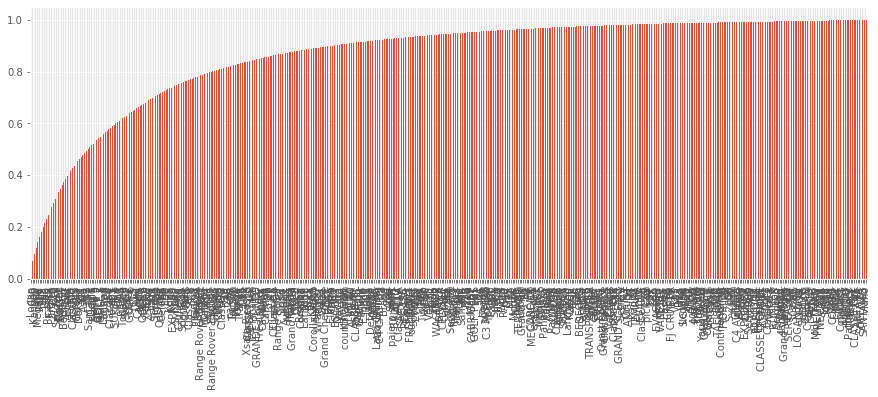

In [104]:
car_prices_ds.model.value_counts().cumsum().apply(lambda x: x / car_prices_ds.model.count()).plot(kind='bar', figsize=(15,5))

In [105]:
## reemplazo por otros modelos marginales

aux_model_series = car_prices_ds.model.value_counts().cumsum().apply(lambda x: x / car_prices_ds.model.count())
imp_models = aux_model_series.loc[aux_model_series <= 0.8].index.tolist()
imp_models

['Logan',
 'Clio',
 'Kangoo',
 'Uno',
 'Megane',
 'Palio',
 '19',
 '205',
 'Polo',
 '206',
 'Picanto',
 'Fiesta',
 'Partner',
 '220',
 'i 10',
 'Sandero',
 'Duster',
 'Passat',
 'GOLF 4',
 'Berlingo',
 '190',
 'Focus',
 'Accent',
 'Punto',
 '308',
 'Classe C',
 'Accord',
 'Corolla',
 'Dokker',
 '309',
 '306',
 'Astra',
 'C4',
 '307',
 'Santa Fe',
 'Doblo',
 '207',
 'Serie 5',
 'Serie 3',
 'GOLF 2',
 'GOLF 7',
 'GOLF 5',
 'Laguna',
 'Touran',
 'C3',
 '250',
 'Classe E',
 '405',
 '407',
 'SUPER 5',
 'Siena',
 'Golf',
 'A3',
 'RAV 4',
 'Touareg',
 'Scenic',
 '301',
 'other',
 'GOLF 6',
 'C5',
 'C15',
 'Civic',
 'Caddy',
 'Leon',
 'CRV',
 'GOLF 3',
 'Jetta',
 'Tepee',
 'XSARA',
 '500',
 'Ibiza',
 '208',
 'Serie 1',
 'Tiguan',
 '508',
 'Qashqai',
 'Celerio',
 'A4',
 'i 30',
 '406',
 'Kuga',
 'ix 35',
 'EXPRESS',
 'R9',
 'Symbol',
 'Alto',
 'Giulietta',
 'R19',
 'Sportage',
 'cooper',
 'Yaris',
 '270',
 'Classe A',
 'R4',
 'Insignia',
 'lancer',
 'Fluence',
 'Bipper',
 'Range Rover Sport',
 

In [106]:
def clean_model_col(model):
    if model in imp_models:
        return model.strip().lower().replace(' ', '_')
    else:
        return 'otros'
    
car_prices_ds.model = car_prices_ds.model.apply(clean_model_col)

In [107]:
## Aplico un encoding similar al label encoding, reemplazando el modelo por un "m{i}" donde i es 
## un número mapeado a un dado modelo

model_keys = car_prices_ds.model.unique().tolist()
model_vals = [i for i in range(len(model_keys))]

model_dict = dict([(k, v) for k, v in zip(model_keys, model_vals)])
model_dict

{'punto': 0,
 'otros': 1,
 'cooper': 2,
 'civic': 3,
 '406': 4,
 '19': 5,
 'megane': 6,
 'logan': 7,
 'leon': 8,
 'other': 9,
 '500': 10,
 'sandero': 11,
 'clio': 12,
 'siena': 13,
 'c4': 14,
 '205': 15,
 'sportage': 16,
 'corolla': 17,
 'accent': 18,
 'autres': 19,
 'r9': 20,
 '207': 21,
 '306': 22,
 'classe_a': 23,
 'xsara': 24,
 '309': 25,
 '301': 26,
 'polo': 27,
 'fiesta': 28,
 'yaris': 29,
 'symbol': 30,
 '206': 31,
 'picanto': 32,
 'astra': 33,
 '208': 34,
 'palio': 35,
 'partner': 36,
 'super_5': 37,
 'i_10': 38,
 'uno': 39,
 'golf_3': 40,
 'celerio': 41,
 'gol': 42,
 'golf_2': 43,
 'ibiza': 44,
 'alto': 45,
 'r4': 46,
 '307': 47,
 'classe_c': 48,
 'serie_5': 49,
 'accord': 50,
 'qashqai': 51,
 'insignia': 52,
 'rav_4': 53,
 'crv': 54,
 'serie_3': 55,
 '407': 56,
 '220': 57,
 'serie_1': 58,
 'passat': 59,
 'golf_7': 60,
 'lancer': 61,
 'carens': 62,
 'scenic': 63,
 'express': 64,
 '250': 65,
 'golf_4': 66,
 'c3': 67,
 'jazz': 68,
 '308': 69,
 'kangoo': 70,
 'c5': 71,
 'golf_6':

In [108]:
car_prices_ds.model.replace(model_dict, inplace=True)
car_prices_ds.model.unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105], dtype=int64)

In [109]:
car_prices_ds = pd.get_dummies(data=car_prices_ds, columns=['model'], prefix='mod', prefix_sep='', drop_first=True)
car_prices_ds.head()

,price,year_model,mileage,color,repair_history,owner_history,fiscal_power,city,fuel_electrique,fuel_essence,...,mod96,mod97,mod98,mod99,mod100,mod101,mod102,mod103,mod104,mod105
0,40800,2010,25000,Blue,0.0,-1,7.0,Khouribga,0,0,...,0,0,0,0,0,0,0,0,0,0
1,45000,1998,50000,Yellow,4.0,1,48.0,Nador,0,1,...,0,0,0,0,0,0,0,0,0,0
2,23000,2005,120000,Yellow,0.0,1,9.0,Berrechid,0,1,...,0,0,0,0,0,0,0,0,0,0
3,56000,2005,85000,Yellow,4.0,1,9.0,Casablanca,0,1,...,0,0,0,0,0,0,0,0,0,0
4,110000,2015,70000,Red,3.0,1,9.0,Casablanca,0,1,...,0,0,0,0,0,0,0,0,0,0


In [110]:
car_prices_ds.dtypes.loc[car_prices_ds.dtypes == 'object']

color    object
city     object
dtype: object

#### color

In [111]:
car_prices_ds.color.unique()

array(['Blue', 'Yellow', 'Red', 'Black', 'White'], dtype=object)

In [112]:
car_prices_ds.color = car_prices_ds.color.apply(lambda x: x.strip().lower())
car_prices_ds.color.unique()

array(['blue', 'yellow', 'red', 'black', 'white'], dtype=object)

In [113]:
car_prices_ds = pd.get_dummies(data=car_prices_ds, columns=['color'], drop_first=True, prefix='', prefix_sep='')
car_prices_ds.columns

Index(['price', 'year_model', 'mileage', 'repair_history', 'owner_history',
       'fiscal_power', 'city', 'fuel_electrique', 'fuel_essence', 'fuel_lpg',
       ...
       'mod100', 'mod101', 'mod102', 'mod103', 'mod104', 'mod105', 'blue',
       'red', 'white', 'yellow'],
      dtype='object', length=129)

#### city

In [114]:
car_prices_ds.city.unique()

array([' Khouribga', ' Nador', ' Berrechid', ' Casablanca',
       ' Had Soualem', ' KÃ©nitra', ' Marrakech', ' MeknÃ¨s',
       ' Ouarzazate', ' Rabat', ' Tanger', ' Ben Guerir', ' Dakhla',
       ' FÃ¨s', ' LaÃ¤youne', ' Mohammedia', ' Oujda', ' TÃ©touan',
       ' Agadir', ' BÃ©ni Mellal', ' Bouznika', ' Guelmim', ' SalÃ©',
       ' El Jadida', ' Errachidia', ' Nouaceur', ' Safi', ' Settat',
       ' Tifelt', ' Skhirat', ' LaÃ¢youne', ' Al HoceÃ¯ma', ' Aousserd',
       ' Assa zag', ' Azemmour', ' Azrou', ' Berkane', ' Chichaoua',
       ' Driouch', ' EsSemara', ' Figuig', ' Fquih Ben Saleh', ' Jrada',
       ' Kelaat EsSraghna', ' Larache', ' Oued Zem', ' Sefrou',
       ' Sidi Kacem', ' TanTan', ' Taroudant', ' Taza', ' Temara',
       ' Tiznit', ' Youssoufia', ' KhÃ©nifra', ' Ouazzane', ' Tata',
       ' Benslimane', ' Sidi Slimane', ' Chefchaouen', ' Sidi Ifni',
       ' Taounate', ' Ait Melloul', ' Agadir Melloul', ' Al Hoceima',
       ' Bir Jdid', ' Boulanouar', ' Deroua', ' 

In [115]:
## reemplazo por otros cityos marginales

aux_city_series = car_prices_ds.city.value_counts().cumsum().apply(lambda x: x / car_prices_ds.city.count())
imp_citys = aux_city_series.loc[aux_city_series <= 0.8].index.tolist()
imp_citys

[' Casablanca',
 ' Rabat',
 ' Marrakech',
 ' Tanger',
 ' FÃ¨s',
 ' Agadir',
 ' MeknÃ¨s',
 ' SalÃ©',
 ' KÃ©nitra',
 ' Oujda']

In [116]:
def clean_city_col(city):
    if city in imp_citys:
        return city.strip().lower().replace(' ', '_')
    else:
        return 'otros'

In [117]:
## Mismo procedimiento que para cityos dado que hay mucha variedad
car_prices_ds.city = car_prices_ds.city.apply(clean_city_col)

city_keys = car_prices_ds.city.unique().tolist()
city_vals = [i for i in range(len(city_keys))]

city_dict = dict([(k, v) for k, v in zip(city_keys, city_vals)])
city_dict

{'otros': 0,
 'casablanca': 1,
 'kã©nitra': 2,
 'marrakech': 3,
 'meknã¨s': 4,
 'rabat': 5,
 'tanger': 6,
 'fã¨s': 7,
 'oujda': 8,
 'agadir': 9,
 'salã©': 10}

In [118]:
car_prices_ds.replace(city_dict, inplace=True)
car_prices_ds.city.value_counts()

1     2708
0     1694
5      860
3      583
6      553
7      478
9      410
4      291
10     286
2      246
8      167
Name: city, dtype: int64

In [119]:
car_prices_ds = pd.get_dummies(data=car_prices_ds, columns=['city'], drop_first=True, prefix='city', prefix_sep='')
car_prices_ds.columns

Index(['price', 'year_model', 'mileage', 'repair_history', 'owner_history',
       'fiscal_power', 'fuel_electrique', 'fuel_essence', 'fuel_lpg',
       'mark_dacia',
       ...
       'city1', 'city2', 'city3', 'city4', 'city5', 'city6', 'city7', 'city8',
       'city9', 'city10'],
      dtype='object', length=138)

In [120]:
car_prices_ds.dtypes[car_prices_ds.dtypes == 'object']

Series([], dtype: object)

## Exploración de Datos

In [121]:
pd.set_option('max_columns', 200)

In [122]:
car_prices_ds.head()

,price,year_model,mileage,repair_history,owner_history,fiscal_power,fuel_electrique,fuel_essence,fuel_lpg,mark_dacia,mark_fiat,mark_ford,mark_hyundai,mark_kia,mark_mercedesbenz,mark_otros,mark_peugeot,mark_renault,mark_volkswagen,mod1,mod2,mod3,mod4,mod5,mod6,mod7,mod8,mod9,mod10,mod11,mod12,mod13,mod14,mod15,mod16,mod17,mod18,mod19,mod20,mod21,mod22,mod23,mod24,mod25,mod26,mod27,mod28,mod29,mod30,mod31,mod32,mod33,mod34,mod35,mod36,mod37,mod38,mod39,mod40,mod41,mod42,mod43,mod44,mod45,mod46,mod47,mod48,mod49,mod50,mod51,mod52,mod53,mod54,mod55,mod56,mod57,mod58,mod59,mod60,mod61,mod62,mod63,mod64,mod65,mod66,mod67,mod68,mod69,mod70,mod71,mod72,mod73,mod74,mod75,mod76,mod77,mod78,mod79,mod80,mod81,mod82,mod83,mod84,mod85,mod86,mod87,mod88,mod89,mod90,mod91,mod92,mod93,mod94,mod95,mod96,mod97,mod98,mod99,mod100,mod101,mod102,mod103,mod104,mod105,blue,red,white,yellow,city1,city2,city3,city4,city5,city6,city7,city8,city9,city10
0,40800,2010,25000,0.0,-1,7.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,45000,1998,50000,4.0,1,48.0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,23000,2005,120000,0.0,1,9.0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,56000,2005,85000,4.0,1,9.0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
4,110000,2015,70000,3.0,1,9.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [123]:
car_prices_ds.owner_history.replace({-1:0}, inplace=True)

In [124]:
car_prices_ds.owner_history.unique()

array([0, 1, 2, 3], dtype=int64)

## Exploración de Datos

In [125]:
ds_crudo.head()

,price,year_model,mileage,fuel_type,mark,model,color,repair_history,owner_history,fiscal_power,city
0,40800,2010,25 000 29 999,LPG,Fiat,Punto,Blue,0.0,-1,7.0,Khouribga
1,45000,1998,50 000 54 999,Essence,MercedesBenz,300,Yellow,4.0,1,48.0,Nador
2,23000,2005,120 000 129 999,Essence,Suzuki,BALENO,Yellow,0.0,1,9.0,Berrechid
3,56000,2005,85 000 89 999,Essence,Daihatsu,Terios,Yellow,4.0,1,9.0,Casablanca
4,110000,2015,70 000 74 999,Essence,mini,cooper,Red,3.0,1,9.0,Casablanca


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 <a list of 37 Text xticklabel objects>)

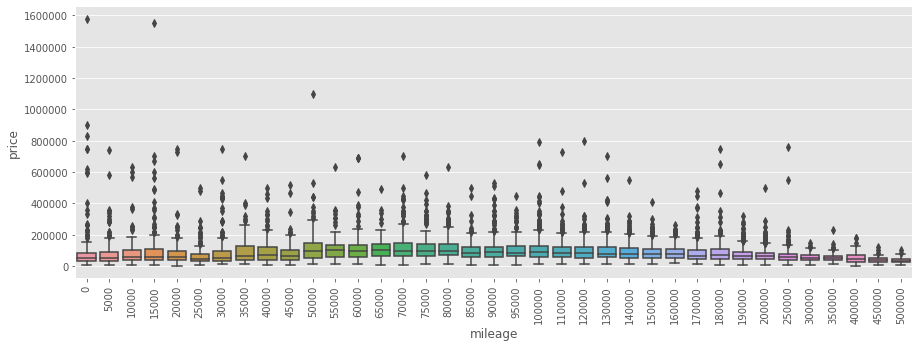

In [126]:
plt.figure(figsize=(15,5))
sns.boxplot(data=car_prices_ds,
               x='mileage',
               y='price')
plt.xticks(rotation=90)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

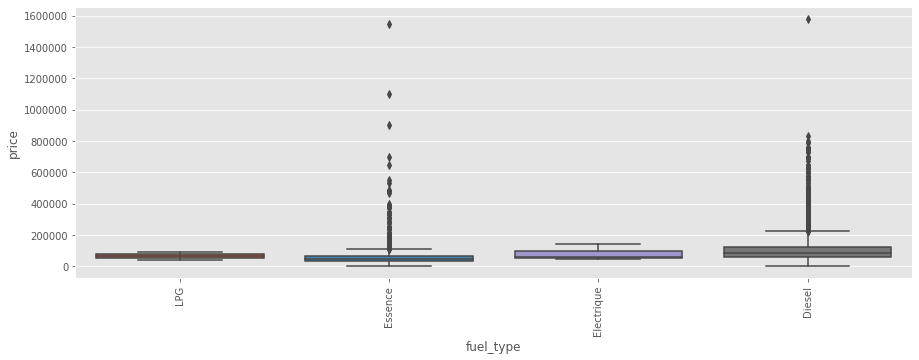

In [127]:
plt.figure(figsize=(15,5))
sns.boxplot(data=ds_crudo,
               x='fuel_type',
               y='price')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

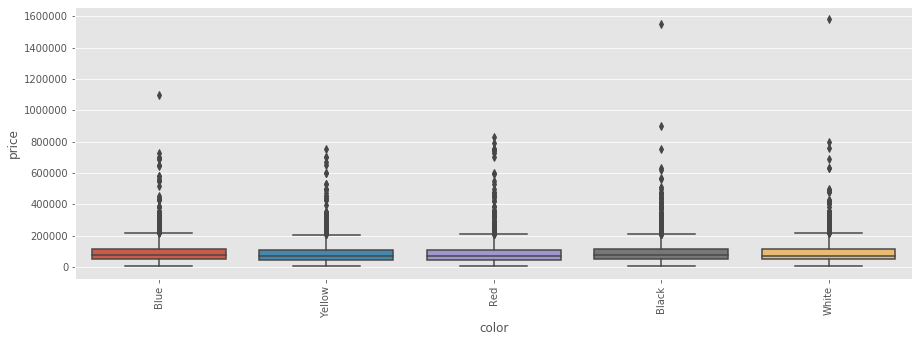

In [128]:
plt.figure(figsize=(15,5))
sns.boxplot(data=ds_crudo,
               x='color',
               y='price')
plt.xticks(rotation=90)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

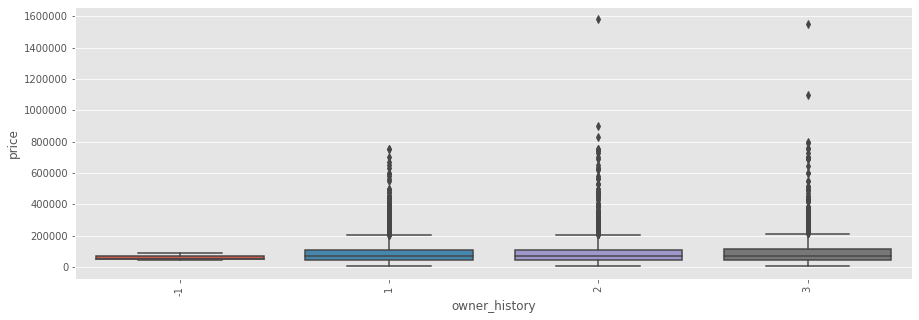

In [129]:
plt.figure(figsize=(15,5))
sns.boxplot(data=ds_crudo,
               x='owner_history',
               y='price')
plt.xticks(rotation=90)

In [130]:
car_prices_ds.head()

,price,year_model,mileage,repair_history,owner_history,fiscal_power,fuel_electrique,fuel_essence,fuel_lpg,mark_dacia,mark_fiat,mark_ford,mark_hyundai,mark_kia,mark_mercedesbenz,mark_otros,mark_peugeot,mark_renault,mark_volkswagen,mod1,mod2,mod3,mod4,mod5,mod6,mod7,mod8,mod9,mod10,mod11,mod12,mod13,mod14,mod15,mod16,mod17,mod18,mod19,mod20,mod21,mod22,mod23,mod24,mod25,mod26,mod27,mod28,mod29,mod30,mod31,mod32,mod33,mod34,mod35,mod36,mod37,mod38,mod39,mod40,mod41,mod42,mod43,mod44,mod45,mod46,mod47,mod48,mod49,mod50,mod51,mod52,mod53,mod54,mod55,mod56,mod57,mod58,mod59,mod60,mod61,mod62,mod63,mod64,mod65,mod66,mod67,mod68,mod69,mod70,mod71,mod72,mod73,mod74,mod75,mod76,mod77,mod78,mod79,mod80,mod81,mod82,mod83,mod84,mod85,mod86,mod87,mod88,mod89,mod90,mod91,mod92,mod93,mod94,mod95,mod96,mod97,mod98,mod99,mod100,mod101,mod102,mod103,mod104,mod105,blue,red,white,yellow,city1,city2,city3,city4,city5,city6,city7,city8,city9,city10
0,40800,2010,25000,0.0,0,7.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,45000,1998,50000,4.0,1,48.0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,23000,2005,120000,0.0,1,9.0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,56000,2005,85000,4.0,1,9.0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
4,110000,2015,70000,3.0,1,9.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

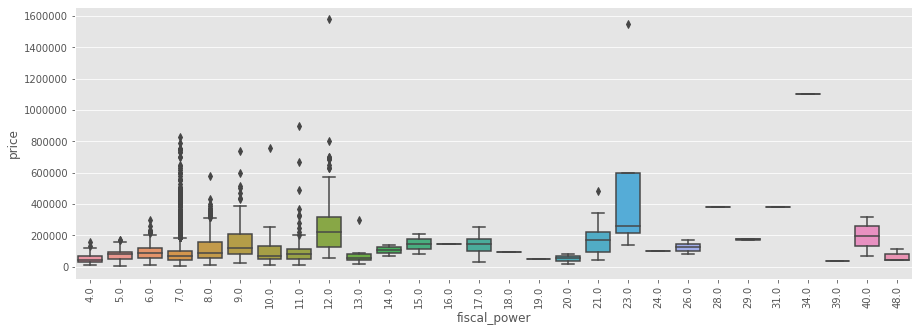

In [132]:
plt.figure(figsize=(15,5))
sns.boxplot(data=ds_crudo,
               x='fiscal_power',
               y='price')
plt.xticks(rotation=90)

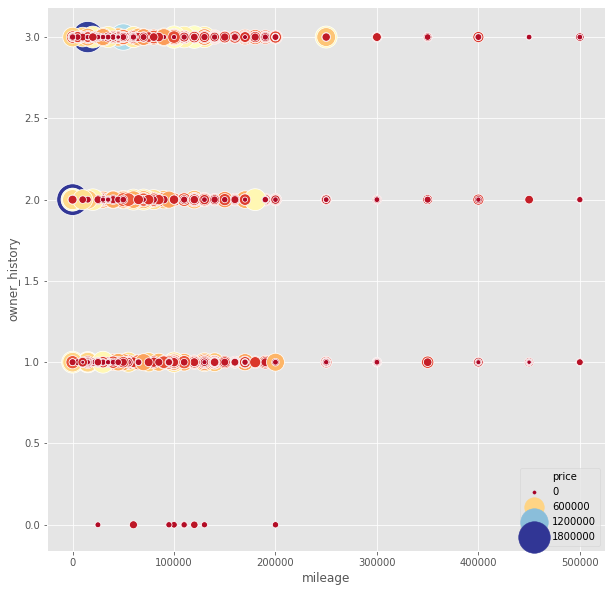

In [133]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=car_prices_ds,
                x='mileage',
                y='owner_history',
                hue='price',
                size='price',
                palette='RdYlBu',
                sizes=(10, 1e3), )

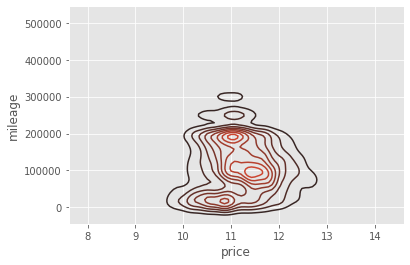

In [134]:
sns.kdeplot(data=car_prices_ds.price.apply(np.log), data2=car_prices_ds.mileage)

(array([-200000.,       0.,  200000.,  400000.,  600000.,  800000.,
        1000000., 1200000., 1400000., 1600000., 1800000.]),
 <a list of 11 Text xticklabel objects>)

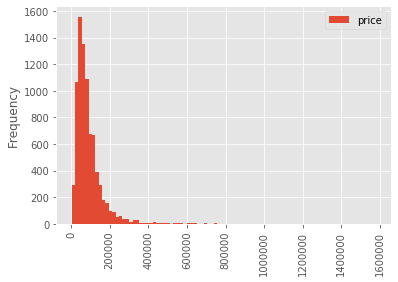

In [135]:
car_prices_ds.plot(kind='hist', y='price', bins=int(np.sqrt(car_prices_ds.shape[0])))
plt.xticks(rotation=90)

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.]),
 <a list of 8 Text xticklabel objects>)

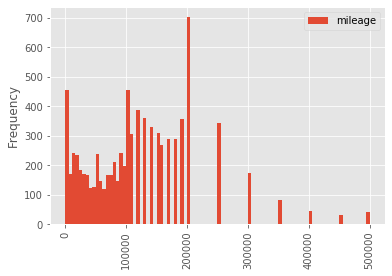

In [136]:
car_prices_ds.plot(kind='hist', y='mileage', bins=int(np.sqrt(car_prices_ds.shape[0])))
plt.xticks(rotation=90)

In [137]:
car_prices_ds.head()

,price,year_model,mileage,repair_history,owner_history,fiscal_power,fuel_electrique,fuel_essence,fuel_lpg,mark_dacia,mark_fiat,mark_ford,mark_hyundai,mark_kia,mark_mercedesbenz,mark_otros,mark_peugeot,mark_renault,mark_volkswagen,mod1,mod2,mod3,mod4,mod5,mod6,mod7,mod8,mod9,mod10,mod11,mod12,mod13,mod14,mod15,mod16,mod17,mod18,mod19,mod20,mod21,mod22,mod23,mod24,mod25,mod26,mod27,mod28,mod29,mod30,mod31,mod32,mod33,mod34,mod35,mod36,mod37,mod38,mod39,mod40,mod41,mod42,mod43,mod44,mod45,mod46,mod47,mod48,mod49,mod50,mod51,mod52,mod53,mod54,mod55,mod56,mod57,mod58,mod59,mod60,mod61,mod62,mod63,mod64,mod65,mod66,mod67,mod68,mod69,mod70,mod71,mod72,mod73,mod74,mod75,mod76,mod77,mod78,mod79,mod80,mod81,mod82,mod83,mod84,mod85,mod86,mod87,mod88,mod89,mod90,mod91,mod92,mod93,mod94,mod95,mod96,mod97,mod98,mod99,mod100,mod101,mod102,mod103,mod104,mod105,blue,red,white,yellow,city1,city2,city3,city4,city5,city6,city7,city8,city9,city10
0,40800,2010,25000,0.0,0,7.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,45000,1998,50000,4.0,1,48.0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,23000,2005,120000,0.0,1,9.0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,56000,2005,85000,4.0,1,9.0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
4,110000,2015,70000,3.0,1,9.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [138]:
ds_crudo.head()

,price,year_model,mileage,fuel_type,mark,model,color,repair_history,owner_history,fiscal_power,city
0,40800,2010,25 000 29 999,LPG,Fiat,Punto,Blue,0.0,-1,7.0,Khouribga
1,45000,1998,50 000 54 999,Essence,MercedesBenz,300,Yellow,4.0,1,48.0,Nador
2,23000,2005,120 000 129 999,Essence,Suzuki,BALENO,Yellow,0.0,1,9.0,Berrechid
3,56000,2005,85 000 89 999,Essence,Daihatsu,Terios,Yellow,4.0,1,9.0,Casablanca
4,110000,2015,70 000 74 999,Essence,mini,cooper,Red,3.0,1,9.0,Casablanca


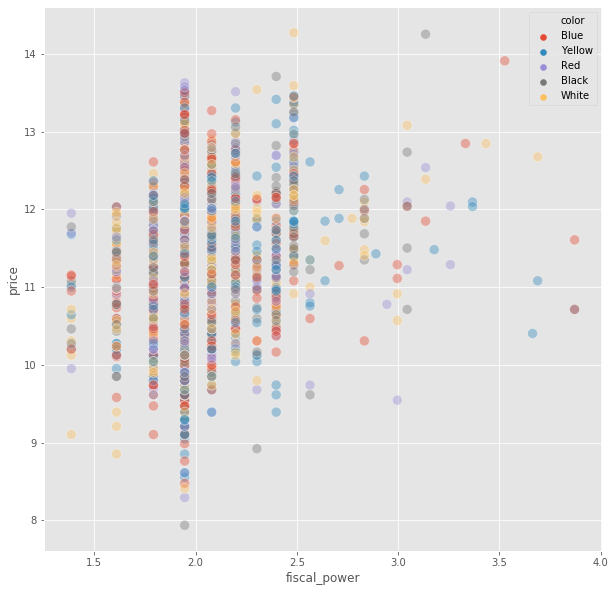

In [139]:
plt.figure(figsize=(10,10))

aux = ds_crudo.copy()
aux[['fiscal_power', 'price']] = aux[['fiscal_power', 'price']].apply(np.log)

sns.scatterplot(data=aux,
                x='fiscal_power',
                y='price',
                hue='color',
                s=100,
                alpha=0.4)

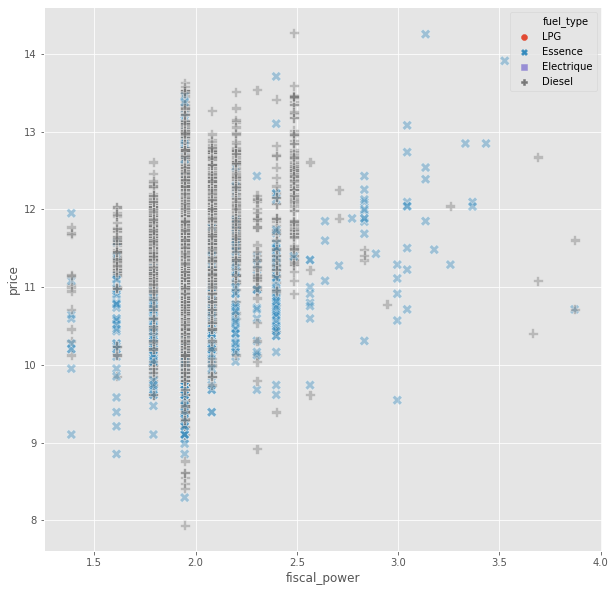

In [140]:
plt.figure(figsize=(10,10))

aux = ds_crudo.copy()
aux[['fiscal_power', 'price']] = aux[['fiscal_power', 'price']].apply(np.log)

sns.scatterplot(data=aux,
                x='fiscal_power',
                y='price',
                hue='fuel_type',
                style='fuel_type',
                s=100,
                alpha=0.4)

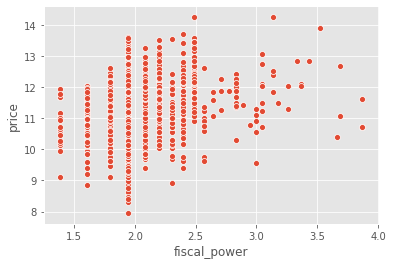

In [141]:
sns.scatterplot(data=car_prices_ds.apply(np.log), x='fiscal_power', y='price')

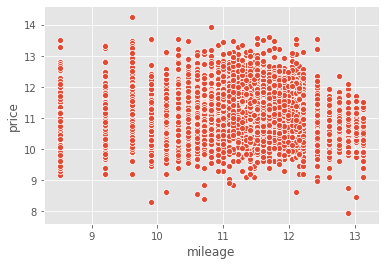

In [142]:
sns.scatterplot(data=car_prices_ds.apply(np.log), x='mileage', y='price')

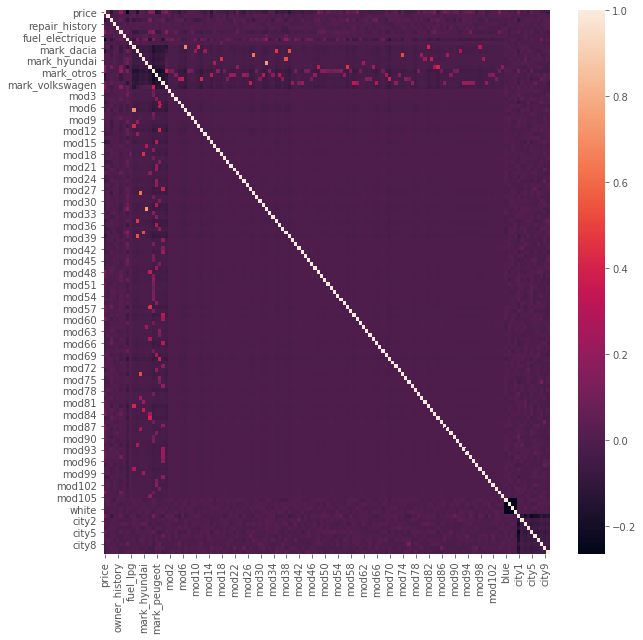

In [163]:
plt.figure(figsize=(10,10))
sns.heatmap(car_prices_ds.corr())

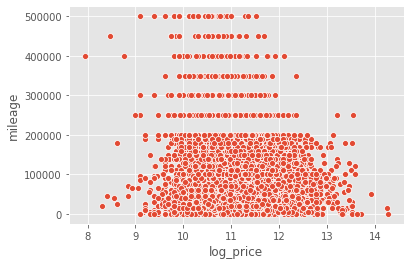

In [161]:
aux = car_prices_ds.copy()
aux['log_mileage'] = aux.mileage.apply(np.log)
aux['log_price'] = aux.price.apply(np.log)

sns.scatterplot(data=aux,
                x='log_price',
                y='mileage')

## Model Selection

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
X_train, X_dt, y_train, y_dt = train_test_split(car_prices_ds.drop(columns=['price']),
                                                car_prices_ds.price,
                                                test_size=0.3)

X_dev, X_test, y_dev, y_test = train_test_split(X_dt, y_dt, test_size=0.5)

In [145]:
from sklearn.linear_model import LinearRegression, Lasso

In [146]:
import sklearn.metrics as skm

In [186]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [187]:
pred = lr.predict(X_dev)

skm.median_absolute_error(y_dev, pred)

21321.863811576273

In [188]:
skm.mean_absolute_error(y_dev, pred)

35522.87911290427

In [189]:
np.sqrt(skm.mean_squared_error(y_dev, pred))

66983.56905868946

In [190]:
skm.r2_score(y_dev, pred)

0.320803046955758

In [151]:
## Train on Lasso Regression

lasso = Lasso()

lasso.fit(X_train, y_train)
pred = lasso.predict(X_dev)

skm.mean_absolute_error(y_dev, pred)

35499.30238807665

In [152]:
np.sqrt(skm.mean_squared_error(y_dev, pred))

66952.59817948002

### RS sobre Lasso

In [153]:
from sklearn.model_selection import GridSearchCV

In [154]:
gs = GridSearchCV(Lasso(),
                  param_grid={'alpha':np.logspace(-4, 1, num=20)},
                  scoring=['neg_mean_squared_error', 'r2'],
                  refit='neg_mean_squared_error')

gs.fit(X_train, y_train)

pred = gs.predict(X_dev)
print(skm.mean_squared_error(y_dev, pred))
np.sqrt(skm.mean_squared_error(y_dev, pred))

C:\Users\jhevia\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10336586503057.115, tolerance: 3237935691.575313
  positive)
C:\Users\jhevia\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9794602060479.502, tolerance: 3142216162.136233
  positive)
C:\Users\jhevia\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10499579002993.477, tolerance: 3232445095.828896
  positive)
C:\Users\jhevia\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dua

C:\Users\jhevia\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8768261975001.894, tolerance: 3142216162.136233
  positive)
C:\Users\jhevia\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8980080901069.117, tolerance: 3232445095.828896
  positive)
C:\Users\jhevia\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8972043836935.607, tolerance: 3035627733.022763
  positive)
C:\Users\jhevia\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

4468050970.804329


66843.48113918312

In [156]:
car_prices_ds.head()

,price,year_model,mileage,repair_history,owner_history,fiscal_power,fuel_electrique,fuel_essence,fuel_lpg,mark_dacia,mark_fiat,mark_ford,mark_hyundai,mark_kia,mark_mercedesbenz,mark_otros,mark_peugeot,mark_renault,mark_volkswagen,mod1,mod2,mod3,mod4,mod5,mod6,mod7,mod8,mod9,mod10,mod11,mod12,mod13,mod14,mod15,mod16,mod17,mod18,mod19,mod20,mod21,mod22,mod23,mod24,mod25,mod26,mod27,mod28,mod29,mod30,mod31,mod32,mod33,mod34,mod35,mod36,mod37,mod38,mod39,mod40,mod41,mod42,mod43,mod44,mod45,mod46,mod47,mod48,mod49,mod50,mod51,mod52,mod53,mod54,mod55,mod56,mod57,mod58,mod59,mod60,mod61,mod62,mod63,mod64,mod65,mod66,mod67,mod68,mod69,mod70,mod71,mod72,mod73,mod74,mod75,mod76,mod77,mod78,mod79,mod80,mod81,mod82,mod83,mod84,mod85,mod86,mod87,mod88,mod89,mod90,mod91,mod92,mod93,mod94,mod95,mod96,mod97,mod98,mod99,mod100,mod101,mod102,mod103,mod104,mod105,blue,red,white,yellow,city1,city2,city3,city4,city5,city6,city7,city8,city9,city10
0,40800,2010,25000,0.0,0,7.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,45000,1998,50000,4.0,1,48.0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,23000,2005,120000,0.0,1,9.0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,56000,2005,85000,4.0,1,9.0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
4,110000,2015,70000,3.0,1,9.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


## Decision Tree

In [167]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV

In [165]:
dt = DecisionTreeRegressor()

In [166]:
dt.fit(X_train, y_train)

pred = dt.predict(X_dev)
print(skm.mean_absolute_error(y_dev, pred))
print(np.sqrt(skm.mean_squared_error(y_dev, pred)))

39103.141821112
88079.35661690282


In [170]:
params = {
    'max_depth': np.linspace(4, 20, dtype=int),
    'max_features': np.linspace(0.3, 1, num=5, endpoint=True),
    'min_samples_split': np.linspace(2, 1e3, num=50, dtype=int),
    'max_leaf_nodes': np.linspace(2, 30, num=20, endpoint=True, dtype=int),
    'min_impurity_decrease': np.linspace(0.01, 0.2, num=30)
}

rs = RandomizedSearchCV(DecisionTreeRegressor(),
                        param_distributions=params,
                        scoring='neg_mean_squared_error',
                        n_iter=20)

rs.fit(X_train, y_train)

pred = rs.predict(X_dev)

print(skm.mean_absolute_error(y_dev, pred))
print(np.sqrt(skm.mean_squared_error(y_dev, pred)))

37967.319188005364
69200.01994416228


In [171]:
rs.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=11,
                      max_features=0.825, max_leaf_nodes=25,
                      min_impurity_decrease=0.2, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=511,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [173]:
### Grid Search sobre rangos menos extensos
params = {
    'max_features': np.linspace(0.7, 0.9, num=5),
    'max_leaf_nodes':np.linspace(20, 40, num=5, dtype=int),
    'min_impurity_decrease': np.linspace(0.15, 0.5, num=10),
    'min_samples_split': np.linspace(400, 700, num=10, dtype=int)
}

gs = GridSearchCV(rs.best_estimator_,
                  param_grid=params,
                  scoring='neg_mean_squared_error')

gs.fit(X_train, y_train)

pred = gs.predict(X_dev)

print(skm.mean_absolute_error(y_dev, pred))
print(np.sqrt(skm.mean_squared_error(y_dev, pred)))

38010.02398854671
68164.5531545424


In [174]:
gs.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=11,
                      max_features=0.75, max_leaf_nodes=30,
                      min_impurity_decrease=0.15, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=400,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [175]:
### Grid Search sobre rangos menos extensos
params = {
    'min_impurity_decrease': np.linspace(0.1, 0.2, num=10),
    'min_samples_split': np.linspace(300, 500, num=10, dtype=int),
    'min_samples_leaf': np.linspace(10, 200, num=10, dtype=int)
}

gs = GridSearchCV(gs.best_estimator_,
                  param_grid=params,
                  scoring='neg_mean_squared_error')

gs.fit(X_train, y_train)

pred = gs.predict(X_dev)

print(skm.mean_absolute_error(y_dev, pred))
print(np.sqrt(skm.mean_squared_error(y_dev, pred)))

38498.83596611973
69152.96090889111


In [176]:
gs.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=11,
                      max_features=0.75, max_leaf_nodes=30,
                      min_impurity_decrease=0.12222222222222223,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=366, min_weight_fraction_leaf=0.0,
                      presort='deprecated', random_state=None, splitter='best')

In [179]:
gs.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=11,
                      max_features=0.75, max_leaf_nodes=30,
                      min_impurity_decrease=0.12222222222222223,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=366, min_weight_fraction_leaf=0.0,
                      presort='deprecated', random_state=None, splitter='best')

In [180]:
MVP = gs.best_estimator_

pred = MVP.predict(X_test)

skm.mean_absolute_error(y_test, pred)

36914.93030427724

In [184]:
errors = [(yt - yp) / yt for yt, yp in zip(y_test, pred)]
np.mean(errors)

-0.36608110467922234

In [185]:
skm.r2_score(y_test, pred)

0.2678949875834149

## Random Forest

In [191]:
from sklearn.ensemble import RandomForestRegressor

In [192]:
rf = RandomForestRegressor()

rf.fit(X_train, y_train)

def evaluar_modelo(model, X, y):
    pred = model.predict(X)
    
    print(f'MSE: {skm.mean_squared_error(y, pred)}')
    print(f'MAE: {skm.mean_absolute_error(y, pred)}')
    print(f'RMSE: {np.sqrt(skm.mean_squared_error(y, pred))}')

evaluar_modelo(rf, X_dev, y_dev)

MSE: 4774566793.958021
MAE: 31641.057131345693
RMSE: 69098.2401654197


In [194]:
params = {
    'criterion': ['mse', 'mae'],
    'max_depth': np.linspace(4, 20, dtype=int),
    'max_features': np.linspace(0.3, 1, num=5, endpoint=True),
    'min_samples_split': np.linspace(2, 1e3, num=30, dtype=int),
    'min_samples_leaf': np.linspace(2, 1e2, num=30, dtype=int),
    'max_leaf_nodes': np.linspace(2, 30, num=20, endpoint=True, dtype=int),
    'min_impurity_decrease': np.linspace(0.01, 0.2, num=30)
}

rs = RandomizedSearchCV(RandomForestRegressor(),
                        param_distributions=params,
                        scoring='neg_mean_squared_error')

rs.fit(X_train, y_train)

evaluar_modelo(rs, X_dev, y_dev)

MSE: 4613868597.7219305
MAE: 37191.8729174002
RMSE: 67925.46354440233


In [195]:
rs.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=14, max_features=0.825, max_leaf_nodes=19,
                      max_samples=None,
                      min_impurity_decrease=0.1410344827586207,
                      min_impurity_split=None, min_samples_leaf=32,
                      min_samples_split=208, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [196]:
params={
    'n_estimators':[50, 100, 200, 300, 500],
     'criterion':['mse', 'mae']
}

gs = GridSearchCV(rs.best_estimator_, 
                 param_grid=params,
                 scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)

evaluar_modelo(gs, X_dev, y_dev)

gs.best_estimator_

MSE: 4604216988.063311
MAE: 37198.337018357975
RMSE: 67854.38075808599


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=14, max_features=0.825, max_leaf_nodes=19,
                      max_samples=None,
                      min_impurity_decrease=0.1410344827586207,
                      min_impurity_split=None, min_samples_leaf=32,
                      min_samples_split=208, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [201]:
pred = gs.best_estimator_.predict(X_test)
errors = [(yt - yp) / yt for yt, yp in zip(y_test, pred)]
np.mean(errors)

-0.3748811309921918

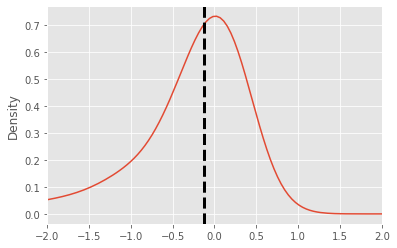

In [207]:
pd.Series(errors).plot(kind='kde')
plt.xlim([-2, 2])
plt.axvline(np.median(errors), ls='--', color='black', lw=3)

## Sigo con Linear Models

In [209]:
params = {'alpha': np.logspace(-4, 2, num=50)}

gs_lasso = GridSearchCV(Lasso(max_iter=3e3),
                        param_grid=params,
                        scoring='neg_mean_squared_error')

gs_lasso.fit(X_train, y_train)

evaluar_modelo(gs_lasso, X_dev, y_dev)

MSE: 4461654738.414823
MAE: 35388.222701882456
RMSE: 66795.61915586099


In [210]:
gs_lasso.best_estimator_

Lasso(alpha=7.9060432109077015, copy_X=True, fit_intercept=True,
      max_iter=3000.0, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [211]:
params

{'alpha': array([1.00000000e-04, 1.32571137e-04, 1.75751062e-04, 2.32995181e-04,
        3.08884360e-04, 4.09491506e-04, 5.42867544e-04, 7.19685673e-04,
        9.54095476e-04, 1.26485522e-03, 1.67683294e-03, 2.22299648e-03,
        2.94705170e-03, 3.90693994e-03, 5.17947468e-03, 6.86648845e-03,
        9.10298178e-03, 1.20679264e-02, 1.59985872e-02, 2.12095089e-02,
        2.81176870e-02, 3.72759372e-02, 4.94171336e-02, 6.55128557e-02,
        8.68511374e-02, 1.15139540e-01, 1.52641797e-01, 2.02358965e-01,
        2.68269580e-01, 3.55648031e-01, 4.71486636e-01, 6.25055193e-01,
        8.28642773e-01, 1.09854114e+00, 1.45634848e+00, 1.93069773e+00,
        2.55954792e+00, 3.39322177e+00, 4.49843267e+00, 5.96362332e+00,
        7.90604321e+00, 1.04811313e+01, 1.38949549e+01, 1.84206997e+01,
        2.44205309e+01, 3.23745754e+01, 4.29193426e+01, 5.68986603e+01,
        7.54312006e+01, 1.00000000e+02])}

In [212]:
params_v2 = {'alpha':np.linspace(7, 9, num=10)}

gs_lasso_v2 = GridSearchCV(gs_lasso.best_estimator_,
                           param_grid=params_v2,
                           scoring='neg_mean_squared_error')
gs_lasso_v2.fit(X_train, y_train)

evaluar_modelo(gs_lasso_v2, X_dev, y_dev)

MSE: 4462824645.954839
MAE: 35393.35705892751
RMSE: 66804.37594914602


In [213]:
evaluar_modelo(gs_lasso_v2, X_test, y_test)

MSE: 3873793824.473079
MAE: 33225.372772082614
RMSE: 62239.809000936686


In [ ]:
pred = gs_lasso_v2.predict)

In [214]:
pred = gs_lasso_v2.best_estimator_.predict(X_test)
errors = [(yt - yp) / yt for yt, yp in zip(y_test, pred)]
np.mean(errors)

-0.3006046879111341

In [215]:
MVP = gs_lasso_v2.best_estimator_

# Reviso datos

In [216]:
car_prices_ds.head()

,price,year_model,mileage,repair_history,owner_history,fiscal_power,fuel_electrique,fuel_essence,fuel_lpg,mark_dacia,mark_fiat,mark_ford,mark_hyundai,mark_kia,mark_mercedesbenz,mark_otros,mark_peugeot,mark_renault,mark_volkswagen,mod1,mod2,mod3,mod4,mod5,mod6,mod7,mod8,mod9,mod10,mod11,mod12,mod13,mod14,mod15,mod16,mod17,mod18,mod19,mod20,mod21,mod22,mod23,mod24,mod25,mod26,mod27,mod28,mod29,mod30,mod31,mod32,mod33,mod34,mod35,mod36,mod37,mod38,mod39,mod40,mod41,mod42,mod43,mod44,mod45,mod46,mod47,mod48,mod49,mod50,mod51,mod52,mod53,mod54,mod55,mod56,mod57,mod58,mod59,mod60,mod61,mod62,mod63,mod64,mod65,mod66,mod67,mod68,mod69,mod70,mod71,mod72,mod73,mod74,mod75,mod76,mod77,mod78,mod79,mod80,mod81,mod82,mod83,mod84,mod85,mod86,mod87,mod88,mod89,mod90,mod91,mod92,mod93,mod94,mod95,mod96,mod97,mod98,mod99,mod100,mod101,mod102,mod103,mod104,mod105,blue,red,white,yellow,city1,city2,city3,city4,city5,city6,city7,city8,city9,city10
0,40800,2010,25000,0.0,0,7.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,45000,1998,50000,4.0,1,48.0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,23000,2005,120000,0.0,1,9.0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,56000,2005,85000,4.0,1,9.0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
4,110000,2015,70000,3.0,1,9.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [219]:
from sklearn.feature_selection import SelectFromModel

In [220]:
from sklearn.linear_model import LassoCV

In [221]:
sfm = SelectFromModel(LassoCV())

sfm.fit(X_train, y_train)

X_train.columns[sfm.get_support()]

Index(['mileage'], dtype='object')

In [231]:
sfm = SelectFromModel(RandomForestRegressor(n_estimators=500))

sfm.fit(X_train, y_train)

X_train.columns[sfm.get_support()]

Index(['year_model', 'mileage', 'repair_history', 'owner_history',
       'fiscal_power', 'fuel_essence', 'mark_mercedesbenz', 'mark_otros',
       'mod1', 'mod12', 'mod48', 'mod60', 'mod87', 'mod104', 'blue', 'red',
       'white', 'yellow', 'city1', 'city3', 'city5', 'city9'],
      dtype='object')

#### Retraineo

In [209]:
params = {'alpha': np.logspace(-4, 2, num=50)}

gs_lasso = GridSearchCV(Lasso(max_iter=3e3),
                        param_grid=params,
                        scoring='neg_mean_squared_error')

gs_lasso.fit(X_train, y_train)

evaluar_modelo(gs_lasso, X_dev, y_dev)

MSE: 4461654738.414823
MAE: 35388.222701882456
RMSE: 66795.61915586099


In [210]:
gs_lasso.best_estimator_

Lasso(alpha=7.9060432109077015, copy_X=True, fit_intercept=True,
      max_iter=3000.0, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [211]:
params

{'alpha': array([1.00000000e-04, 1.32571137e-04, 1.75751062e-04, 2.32995181e-04,
        3.08884360e-04, 4.09491506e-04, 5.42867544e-04, 7.19685673e-04,
        9.54095476e-04, 1.26485522e-03, 1.67683294e-03, 2.22299648e-03,
        2.94705170e-03, 3.90693994e-03, 5.17947468e-03, 6.86648845e-03,
        9.10298178e-03, 1.20679264e-02, 1.59985872e-02, 2.12095089e-02,
        2.81176870e-02, 3.72759372e-02, 4.94171336e-02, 6.55128557e-02,
        8.68511374e-02, 1.15139540e-01, 1.52641797e-01, 2.02358965e-01,
        2.68269580e-01, 3.55648031e-01, 4.71486636e-01, 6.25055193e-01,
        8.28642773e-01, 1.09854114e+00, 1.45634848e+00, 1.93069773e+00,
        2.55954792e+00, 3.39322177e+00, 4.49843267e+00, 5.96362332e+00,
        7.90604321e+00, 1.04811313e+01, 1.38949549e+01, 1.84206997e+01,
        2.44205309e+01, 3.23745754e+01, 4.29193426e+01, 5.68986603e+01,
        7.54312006e+01, 1.00000000e+02])}

In [212]:
params_v2 = {'alpha':np.linspace(7, 9, num=10)}

gs_lasso_v2 = GridSearchCV(gs_lasso.best_estimator_,
                           param_grid=params_v2,
                           scoring='neg_mean_squared_error')
gs_lasso_v2.fit(X_train, y_train)

evaluar_modelo(gs_lasso_v2, X_dev, y_dev)

MSE: 4462824645.954839
MAE: 35393.35705892751
RMSE: 66804.37594914602


In [213]:
evaluar_modelo(gs_lasso_v2, X_test, y_test)

MSE: 3873793824.473079
MAE: 33225.372772082614
RMSE: 62239.809000936686


In [214]:
pred = gs_lasso_v2.best_estimator_.predict(X_test)
errors = [(yt - yp) / yt for yt, yp in zip(y_test, pred)]
np.mean(errors)

-0.3006046879111341